# **Segmentação de mercado com K-Means**

- Dados: https://www.kaggle.com/arjunbhasin2013/ccdata



### Um dos pontos cruciais de marketing é conhecer os clientes e suas necessidades.

### Entendendo os consumidores pode-se enviar campanhas específicas para necessidades específicas.

![](https://www.surveylegend.com/wordpress/wp-content/uploads/2021/05/market-segmentation.png)

### **Informações sobre os dados:**

O conjunto de dados que será usado contém o comportamento de uso de cerca de 9.000 usuários de cartão de crédito nos últimos seis meses. É necessário agrupar os clientes de cartão de crédito em vários grupos de acordo com o comportamento do cliente para obter uma estratégia de marketing de cartão de crédito eficiente.

**CUST_ID :** Identificação do titular do cartão de crédito (Categórico)

**BALANCE:** Saldo restante na conta para fazer compras 

**BALANCE_FREQUENCY :** Com que frequência o Saldo é atualizado, pontuação entre 0 e 1 (1 = atualizado com frequência, 0 = não atualizado com frequência)

**PURCHASES :** Quantidade de compras/transações feitas na conta

**ONEOFF_PURCHASES:** valor máximo de compra feito de uma só vez (sem parcelar)

**INSTALLMENTS_PURCHASES :** Valor da compra feita em parcelas

**CASH_ADVANCE :** Dinheiro adiantado fornecido pelo usuário

**PURCHASES_FREQUENCY:** Com que frequência as compras estão sendo feitas, pontua entre 0 e 1 (1 = comprado com frequência, 0 = não comprado com frequência)

**ONEOFFPURCHASESFREQUENCY :** Com que frequência as compras acontecem de uma só vez, à vista (1 = comprado com frequência, 0 = não comprado com frequência)

**PURCHASESINSTALLMENTSFREQUENCY :** Com que frequência as compras parceladas estão sendo feitas (1 = frequentemente feito, 0 = não feito com frequência)

**CASHADVANCEFREQUENCY :** Frequência de saques de dinheiro adiantado

**CASHADVANCETRX:** Número de transações feitas como "Cash in Advanced" (frequência com que o cliente foi no caixa pedir dinheiro adiantado)

**PURCHASES_TRX:** Número de transações de compra feitas

**CREDIT_LIMIT :** Limite de cartão de crédito para usuário

**PAYMENTS:** Valor do pagamento de fatura feito pelo usuário

**MINIMUM_PAYMENTS:** valor mínimo de pagamentos de fatura feitos pelo usuário

**PRCFULLPAYMENT :** Porcentagem do pagamento integral da fatura pago pelo usuário

**TENURE:** Posse do titular do cartão (há quantos anos a pessoa possui esse cartão e é cliente do banco)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [2]:
creditcard_df = pd.read_csv('CC GENERAL.csv')

In [3]:
creditcard_df.shape

(8950, 18)

In [4]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### **Estatística descritiva**

In [6]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


O valor médio das compras á vista (**ONEOFF_PURCHASES**) é de 592 e das comprar parceladas (**INSTALLMENTS_PURCHASES**) é de 411.

Existe um valor alto em **CASH_ADVANCE** que indica que as pessoas sacam mais dinheiro do limite do cartão de crédito do que o valor médio para compras parceladas e à vista. *Para um banco é interessante que clientes saquem mais dinheiro do cartão de crédito, pois assim eles ganham mais com juros.* 

A frequencia de compras parceladas é maior que as compras a vista.

Em média, somente 15% dos clientes pagam o valor completo da fatura (**PRC_FULL_PAYMENT**).

## Visualização e exploração dos dados

In [7]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Preenchendo os valores nulos de MINIMUM_PAYMENTS com a média dos valores da coluna.

In [8]:
creditcard_df['MINIMUM_PAYMENTS'].mean()

864.2065423050828

In [9]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

Fazendo o mesmo para CREDIT_LIMIT

In [10]:
creditcard_df['CREDIT_LIMIT'].mean()

4494.449450364621

In [11]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [12]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
creditcard_df.duplicated().sum()

0

In [13]:
# removendo atributo desnecessário
creditcard_df.drop('CUST_ID', axis = 1, inplace = True)

In [14]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [15]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [16]:
len(creditcard_df.columns)

17

**Observando a distribuição dos dados**

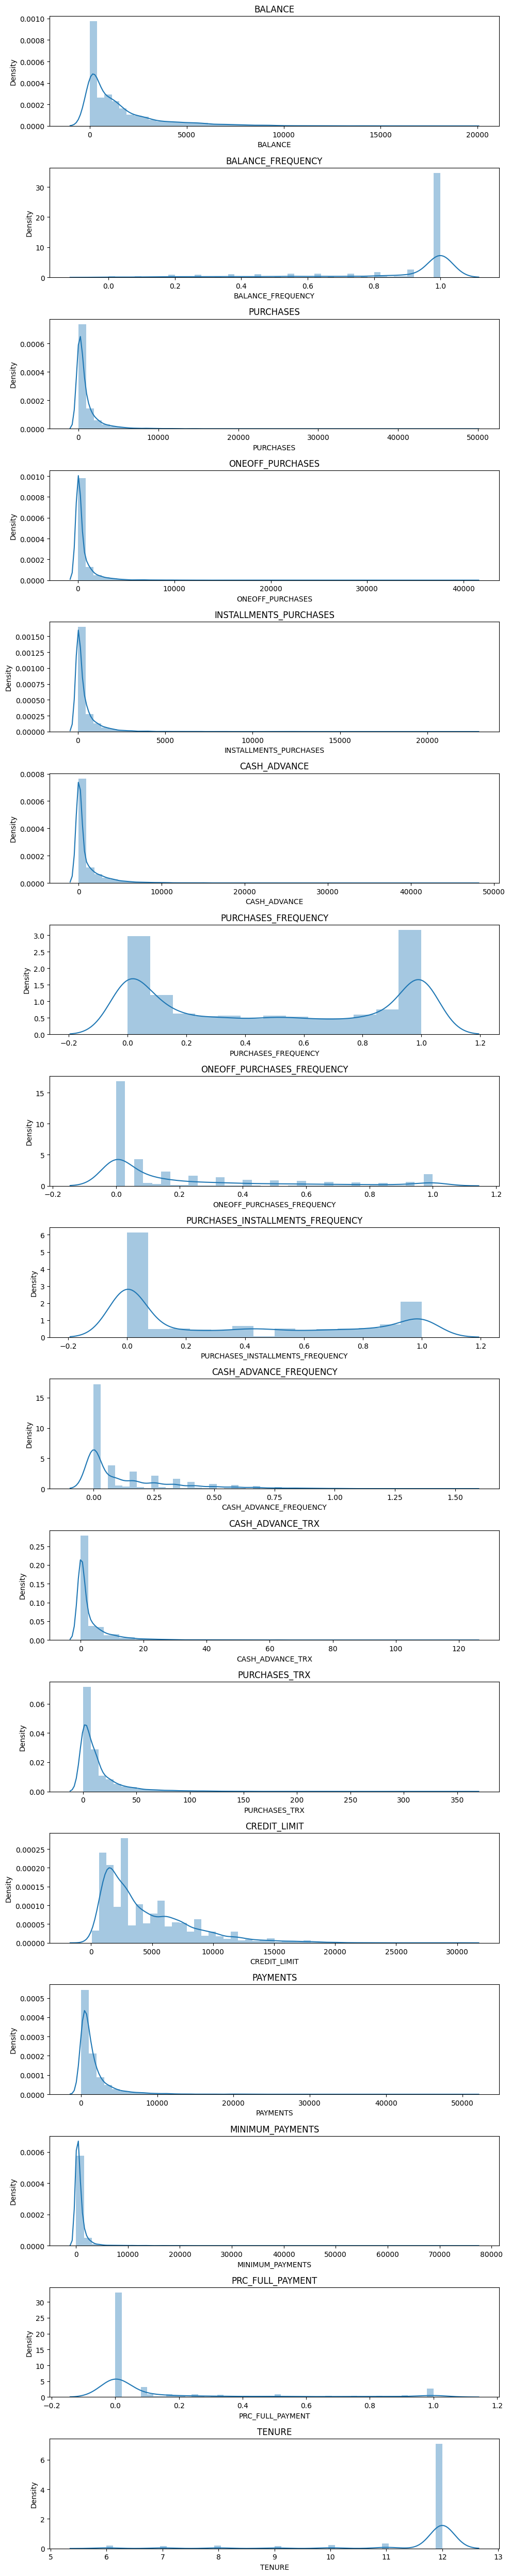

In [17]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i + 1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde = True)
  plt.title(creditcard_df.columns[i])
plt.tight_layout();

- **BALANCE** - A maioria dos clientes têm saldo entre 0 e 5000
- **BALANCE_FREQUENCY** - Os clientes atualizam com frequência o saldo das contas
- **PURCHASES** - A maioria das transações estão abaixo de 10.000
- **ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES** - O valor das compras à vista são maiores que das compras parceladas
- **PURCHASES_FREQUENCY** - Existe dois grupos aparentes, um grupo de clientes que compram com baixa frequência (valor entre 0.0 e 0.2) e um grupo que compra com bastante frequência (valor entre 0.8 e 1.0)
- **ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FRQUENCY**- As compras à vista e à prazo ocorrem com frequências similares com valores de 0.0 a 0.32
- **TENURE** - A maioria dos clientes do banco são clientes há pelo menos 12 anos 

**Verificando correlações**

In [18]:
correlations = creditcard_df.corr()

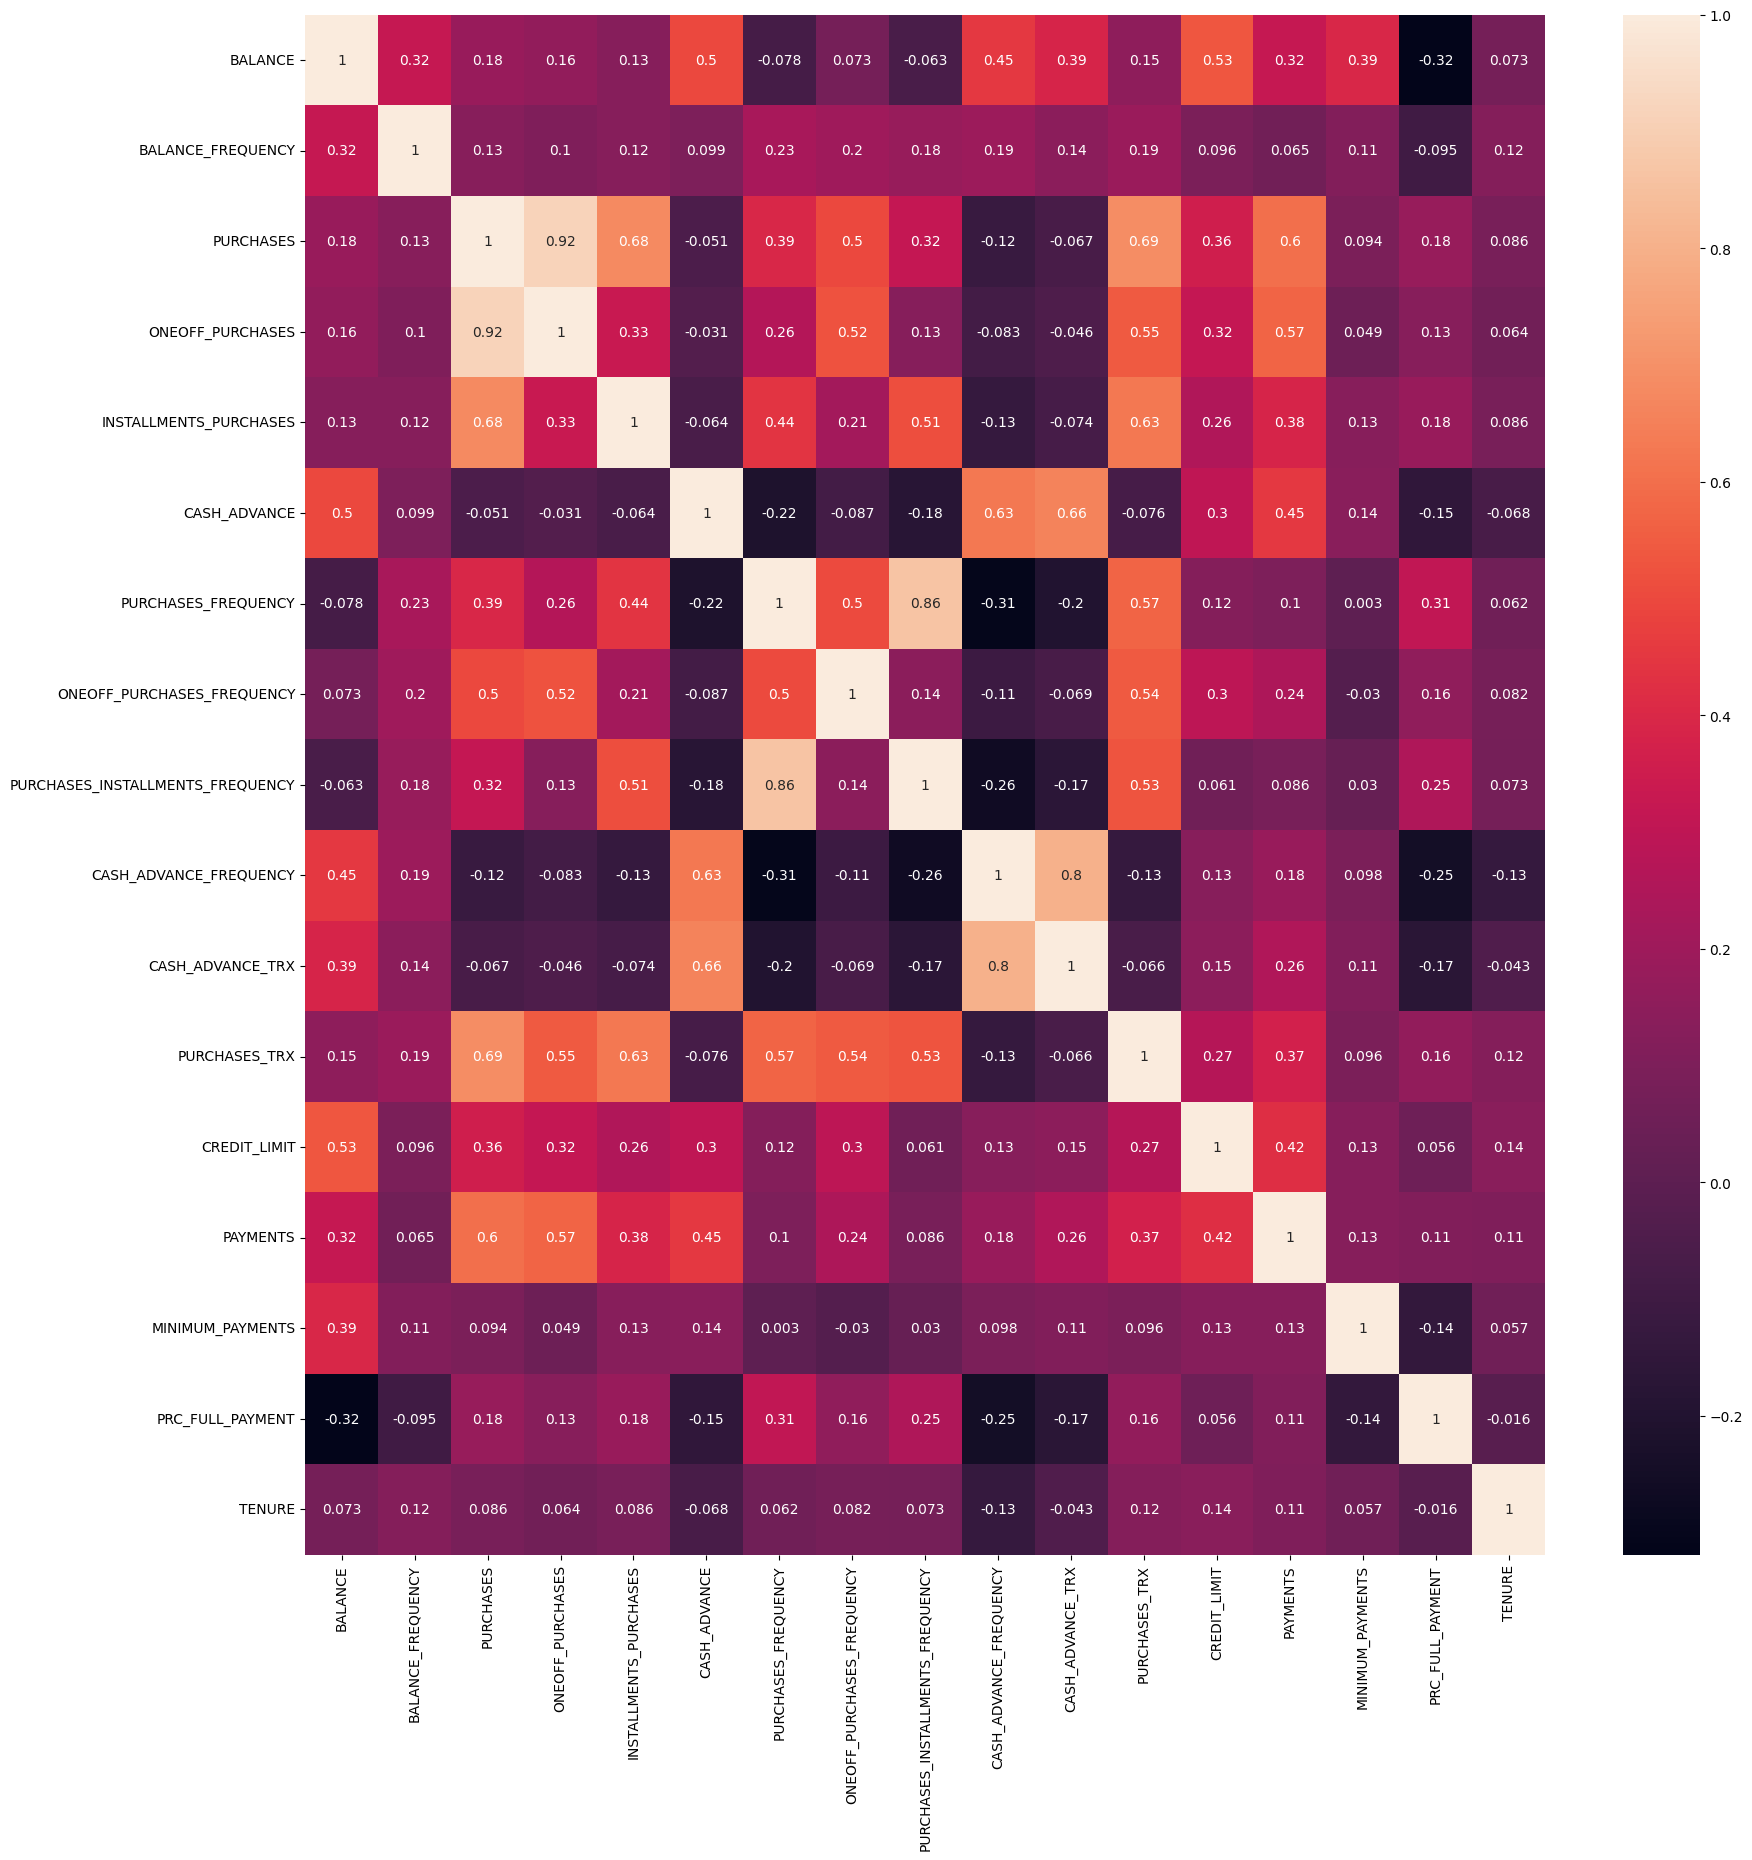

In [19]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True);

A frequência de compras parceladas está muito correlacionada com a frequência de compras no geral.

O valor total comprado (PURCHASES) está muito relacionado com compras a vista. Isso indica que a maior parte dos valores das compras vem de compras à vista e não parceladas.

O valor total de compra com limite de cartão de crédito(CREDIT_LIMIT) tem baixo valor de correlação. Isso pode significar que o limite do cartão não tem tanta influência no valor total de compras que os clientes fazem.


## Definição do número de clusters usando o Elbow Method

Uma etapa fundamental para qualquer algoritmo não supervisionado é determinar o número ideal de clusters nos quais os dados podem ser agrupados.
- https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

Aplicando Feature Scaling nos dados. Como os dados possuem muita variação, como podemos ver que BALANCE pode variar de 0 até 19043 eles precisam ser colocados dentro de um mesmo intervalo para que possamos comparar atributo com atributo de maneira padronizada.

In [20]:
min(creditcard_df['BALANCE']), max(creditcard_df['BALANCE'])

(0.0, 19043.13856)

In [21]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [22]:
type(creditcard_df_scaled), type(creditcard_df)

(numpy.ndarray, pandas.core.frame.DataFrame)

A padronização deixa os dados em um intervalo de -3 até 3.

In [23]:
min(creditcard_df_scaled[0]), max(creditcard_df_scaled[0])

(-0.9604333444542572, 0.36067954425377496)

In [24]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

Vamos utilizar 20 clusters. Para cada cluster nós podemos calcular um Within cluster sum of squares (soma dos quadrados dentro do cluster). 

A soma dos quadrados dentro do cluster é uma medida da variabilidade das observações dentro de cada cluster. Em geral, um cluster com uma pequena soma de quadrados é mais compacto do que um cluster com uma grande soma de quadrados. Clusters que possuem valores mais altos exibem maior variabilidade das observações dentro do cluster.

In [25]:
wcss_1 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(creditcard_df_scaled)
  wcss_1.append(kmeans.inertia_)

In [26]:
print(wcss_1)

[152149.99999999983, 127784.8314168403, 111986.6301244729, 99073.93826774803, 91503.45875445532, 84850.27216086024, 79532.74481840568, 74624.71643963648, 70912.64677726707, 66455.43871548664, 63633.18672380768, 61355.502215972025, 59141.84774391025, 57493.76363500043, 56201.00928718022, 54558.61921614918, 53028.33104592604, 51791.59823919008, 50892.0931432825]


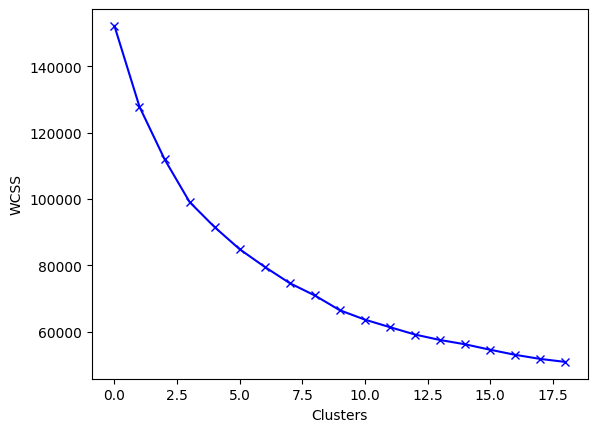

In [27]:
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

É preciso encontrar um ponto onde não há mais tanta queda no valor de WCSS. Podemos ver que a partir de aproximadamente 7 ou 8 clusters a queda já não é mais tão acentuada, então usaresmo 8 clusters.

## **Agrupamento com k-means**

In [28]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(creditcard_df_scaled) # treinando k-means
labels = kmeans.labels_  # clusters

O k-means gera um número, que seria um indentificador para cada grupo que ele criou.

In [29]:
labels, len(labels)

(array([0, 4, 1, ..., 6, 6, 6], dtype=int32), 8950)

Observando a quantidade de clientes por grupo. No grupo 0 há 2761 clientes, no grupo 1 há 1128 clientes.

In [30]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([2761, 1128, 2019,   23,  876, 1184,  625,  334]))

Em cada vetor está a média dos atributos de cada cluster.
A média do saldo na conta corrente,a média das compras à vista, a média das compras a prazo e assim por diante.

In [31]:
kmeans.cluster_centers_ # centroids

array([[ 1.07868761e-02,  4.04069220e-01, -3.56304460e-01,
        -2.40991995e-01, -3.99622166e-01, -9.52495306e-02,
        -8.49641340e-01, -3.91508328e-01, -7.53387541e-01,
         1.00812573e-01, -3.02457124e-02, -4.80641922e-01,
        -3.04056431e-01, -2.50301496e-01, -1.25574974e-02,
        -4.55100255e-01,  2.73709123e-01],
       [-1.21245239e-01,  4.01985505e-01,  5.54948800e-01,
         6.78765510e-01,  6.49624725e-02, -3.32631340e-01,
         9.90572278e-01,  1.91063464e+00,  1.98410943e-01,
        -4.16243639e-01, -3.32911501e-01,  6.47171644e-01,
         4.48886929e-01,  1.56424228e-01, -1.55149361e-01,
         4.45048886e-01,  2.71249083e-01],
       [-3.57700165e-01,  3.32029256e-01, -3.00778106e-02,
        -2.40319864e-01,  3.70193301e-01, -3.62518197e-01,
         9.94051906e-01, -3.80778189e-01,  1.20569512e+00,
        -4.72089540e-01, -3.59579555e-01,  1.93609205e-01,
        -2.56533073e-01, -2.13607852e-01, -3.00377482e-02,
         3.12174476e-01,  2.5

In [32]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.010787,0.404069,-0.356304,-0.240992,-0.399622,-0.095250,-0.849641,-0.391508,-0.753388,0.100813,-0.030246,-0.480642,-0.304056,-0.250301,-0.012557,-0.455100,0.273709
1,-0.121245,0.401986,0.554949,0.678766,0.064962,-0.332631,0.990572,1.910635,0.198411,-0.416244,-0.332912,0.647172,0.448887,0.156424,-0.155149,0.445049,0.271249
2,-0.357700,0.332029,-0.030078,-0.240320,0.370193,-0.362518,0.994052,-0.380778,1.205695,-0.472090,-0.359580,0.193609,-0.256533,-0.213608,-0.030038,0.312174,0.256568
3,1.865907,0.332878,12.596844,13.111182,5.696389,-0.004178,1.033322,2.170634,0.866221,-0.476183,-0.214854,4.566558,3.174197,8.991136,1.064817,1.236317,0.295702
4,1.680699,0.392872,-0.218855,-0.155574,-0.231729,2.004881,-0.475298,-0.208397,-0.417301,1.914457,1.922095,-0.267417,1.019868,0.815338,0.552014,-0.391713,0.071177
5,-0.701092,-2.138460,-0.309767,-0.234182,-0.302091,-0.322644,-0.553598,-0.440043,-0.439844,-0.521764,-0.376480,-0.418560,-0.176244,-0.202002,-0.257020,0.283165,0.201504
6,-0.337200,-0.351274,-0.287007,-0.212744,-0.287412,0.067931,-0.202320,-0.283605,-0.226363,0.305828,-0.000825,-0.387485,-0.562891,-0.391704,-0.209098,0.013610,-3.199775
7,1.070699,0.473159,2.590381,1.886193,2.659763,-0.129642,1.160059,1.573431,1.259689,-0.272763,-0.132544,3.203679,1.336460,1.526328,0.591846,0.275851,0.336070


Como os dados foram escalonados vamos usar a função inverse_transform para transformá-los na escala original.

In [33]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1586.926800,0.972991,241.954862,192.440018,49.694278,779.128397,0.149348,0.085663,0.065022,0.155318,3.042422,2.762872,3388.167754,1008.545547,834.941824,0.020606,11.883611
1,1312.113096,0.972497,2188.861498,1719.049096,469.812402,281.327653,0.887915,0.772437,0.443291,0.051850,0.976950,30.796099,6127.683752,2185.976665,502.637502,0.283884,11.880319
2,819.952127,0.955925,938.943127,193.555618,745.828854,218.653520,0.889312,0.088864,0.843611,0.040674,0.794960,19.522233,3561.077175,1114.770050,794.204837,0.245020,11.860672
3,5448.201718,0.956126,27916.555652,22354.314348,5562.241304,970.110470,0.905072,0.850000,0.708696,0.039855,1.782609,128.217391,16043.478261,27761.600386,3345.718254,0.515316,11.913043
4,5062.707160,0.970339,535.618354,334.216434,201.518114,5183.199852,0.299591,0.140289,0.198591,0.518247,16.365714,8.062857,8205.148052,4093.466727,2150.651430,0.039145,11.612571
5,105.211929,0.370689,341.382646,203.742891,137.890642,302.271277,0.268165,0.071184,0.189632,0.030734,0.679628,4.306002,3853.203250,1148.368309,265.232576,0.236535,11.786982
6,862.621956,0.794057,390.010464,239.326032,151.164432,1121.325562,0.409150,0.117853,0.274475,0.196343,3.243200,5.078400,2446.423119,599.199915,376.911693,0.157695,7.235200
7,3793.045142,0.989358,6537.592934,3723.130928,2816.258413,707.006622,0.955938,0.671843,0.865070,0.080562,2.344311,94.341317,9357.035928,6151.714808,2243.478572,0.234396,11.967066


### **Estatísticas dos grupos**

Agora é possível visualizar estatísticas para cada grupo. Podemos ver que o grupo 5 possui pouco saldo na conta e saca pouco dinheiro do limite do cartão. O grupo 3 é o  que possui mais saldo na conta e saca valores maiores do limite do cartão e compram com muito mais frequência que o grupo 5. O grupo 6 é de clientes novos com menor tempo no banco.

Adiante analisaremos melhor cada grupo a depender dos resultados obtidos com o PCA.

In [34]:
labels, len(labels)

(array([0, 4, 1, ..., 6, 6, 6], dtype=int32), 8950)

Gerando um DataFrame que com uma coluna que indique a que grupo cada cliente pertence.

In [35]:
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)

In [36]:
creditcard_df_cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,6


## **Observando distribuições dos valores para cada grupo**

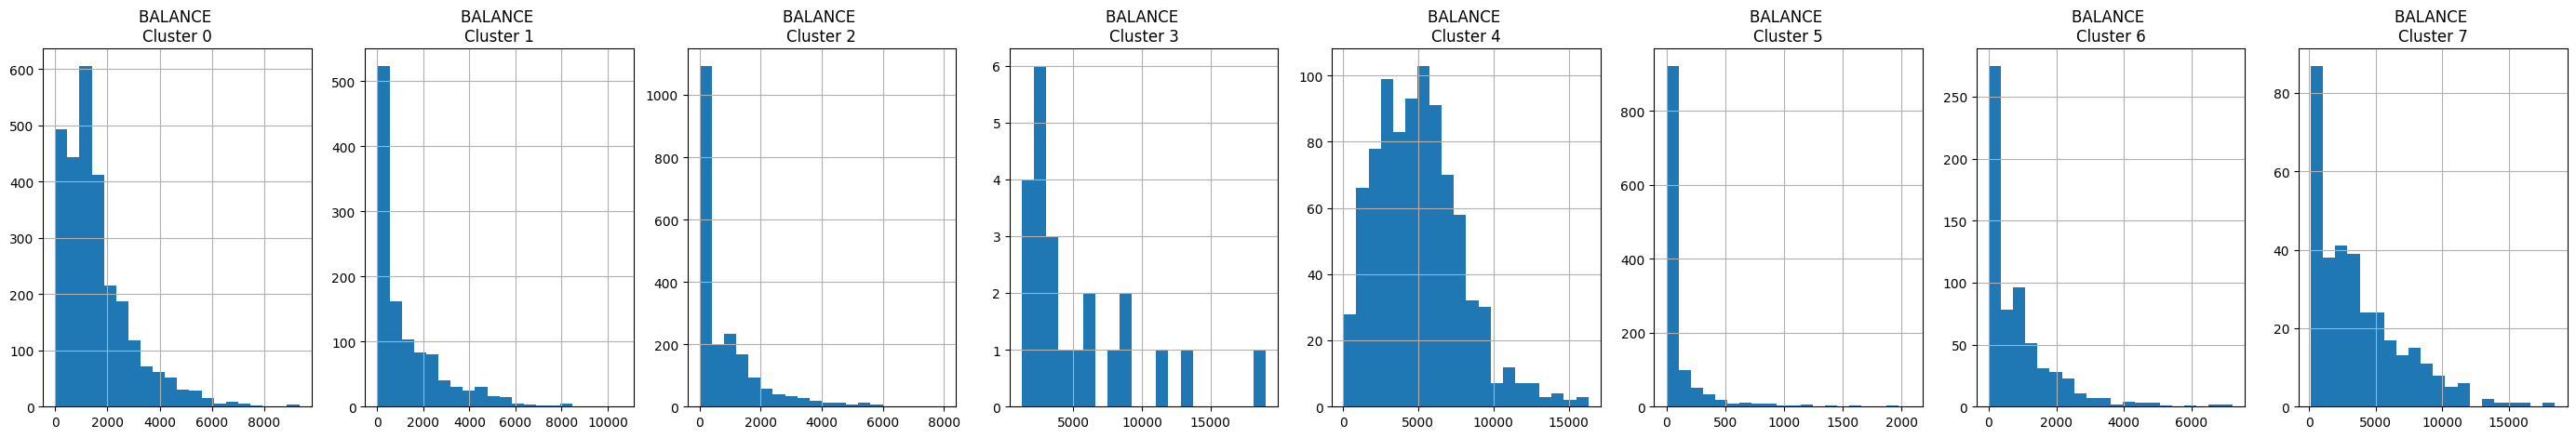

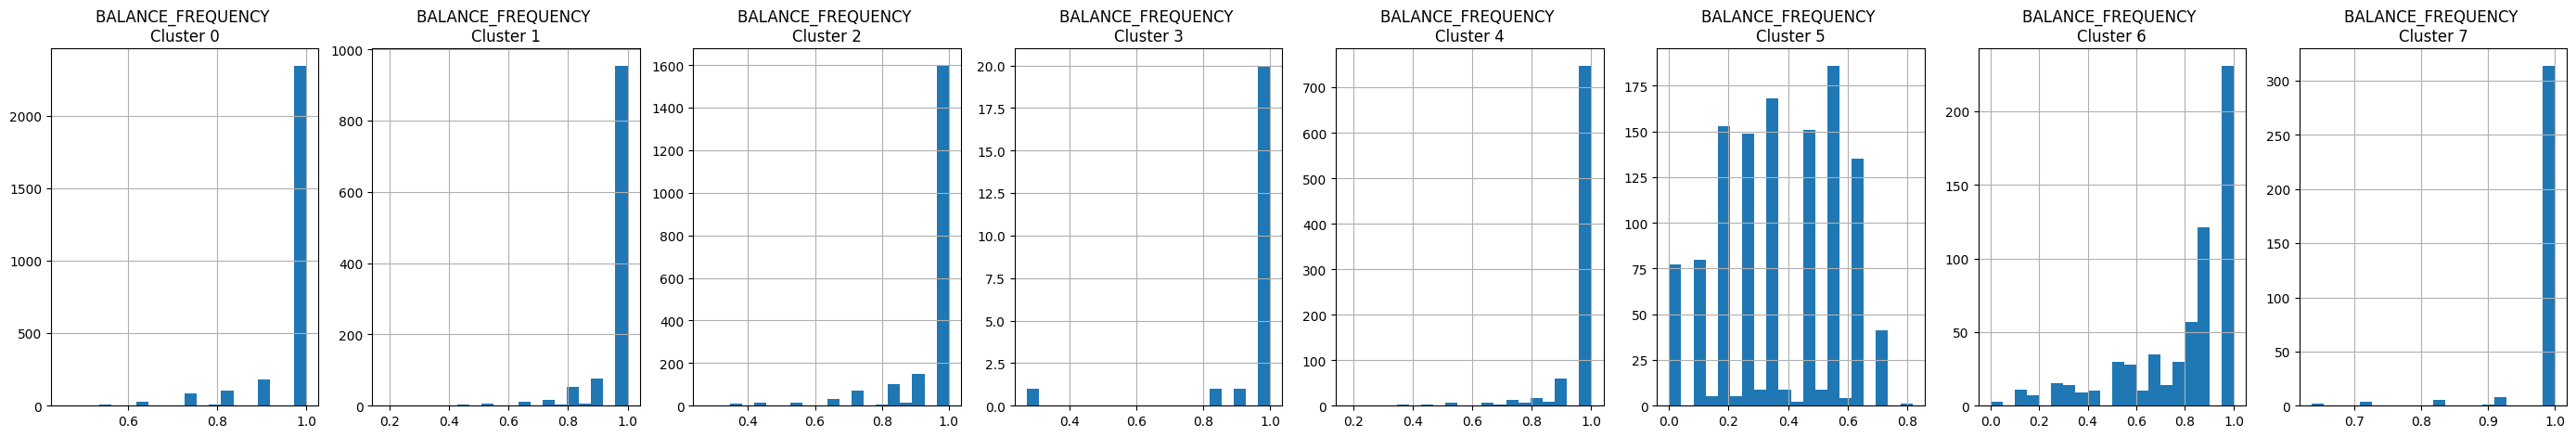

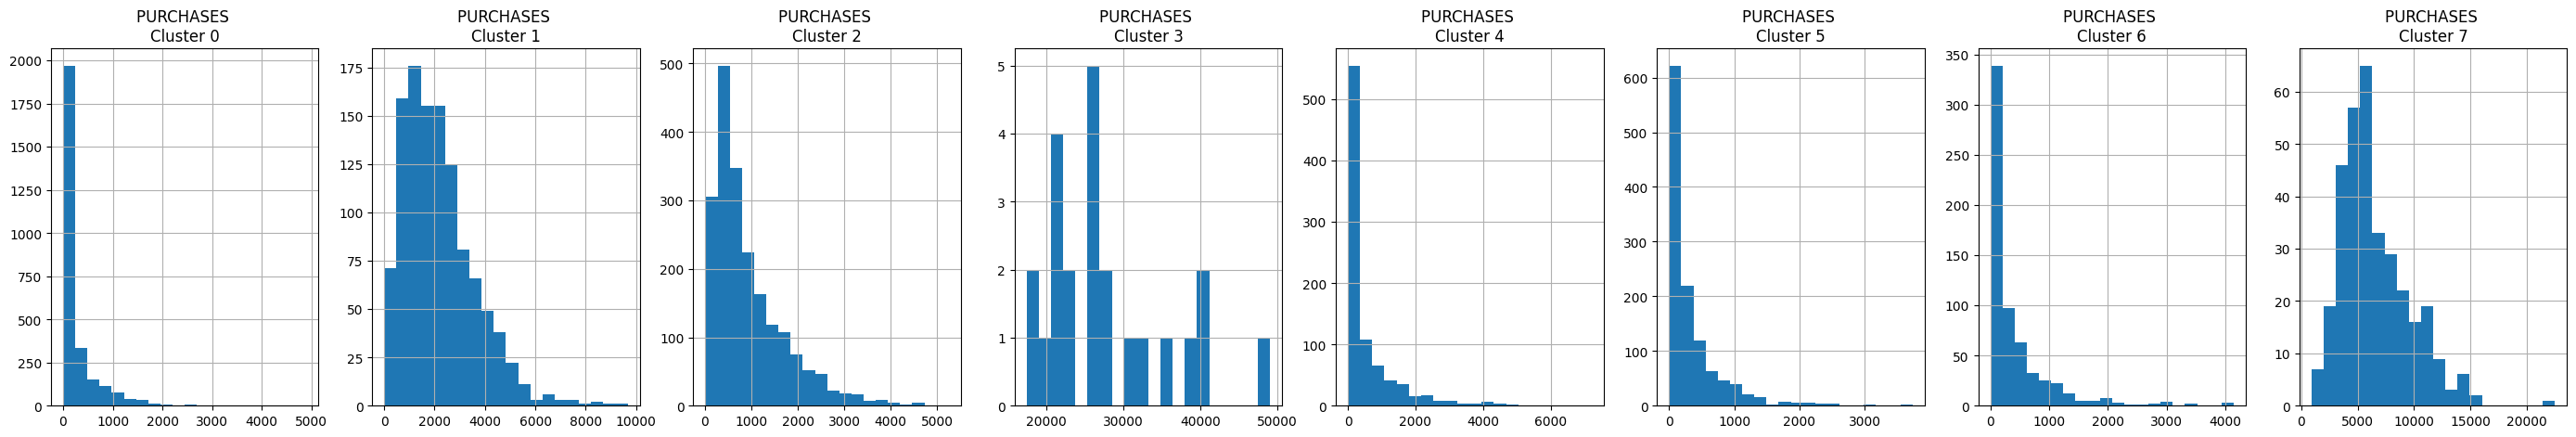

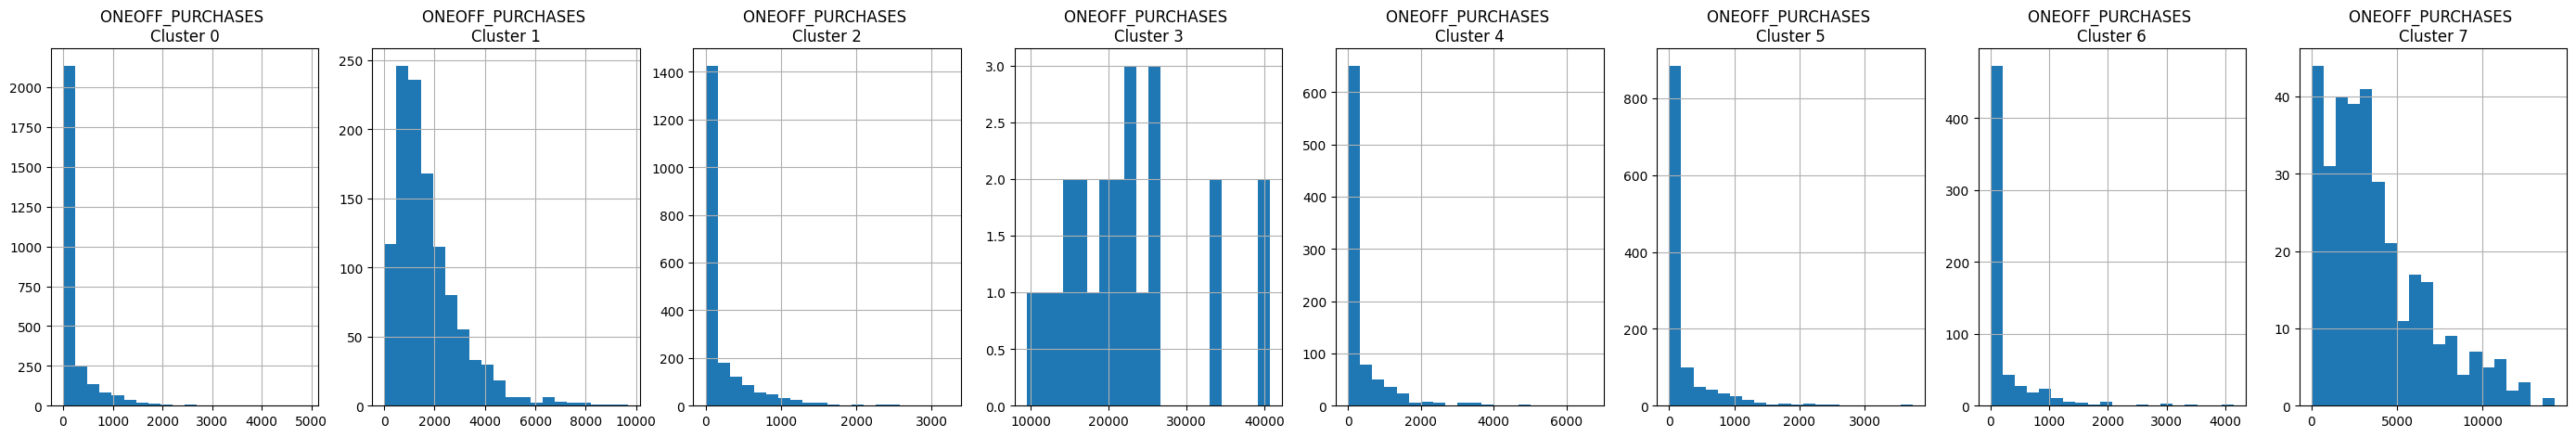

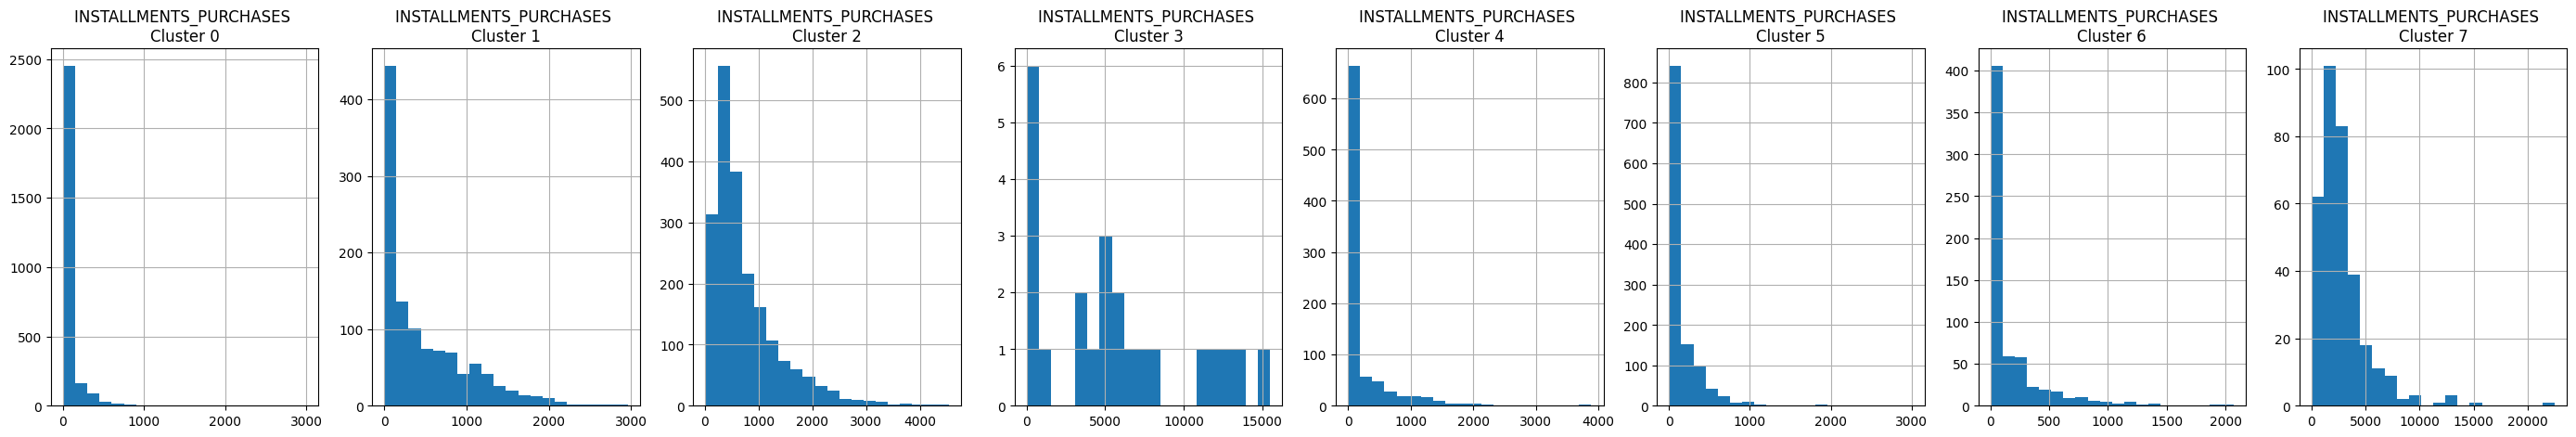

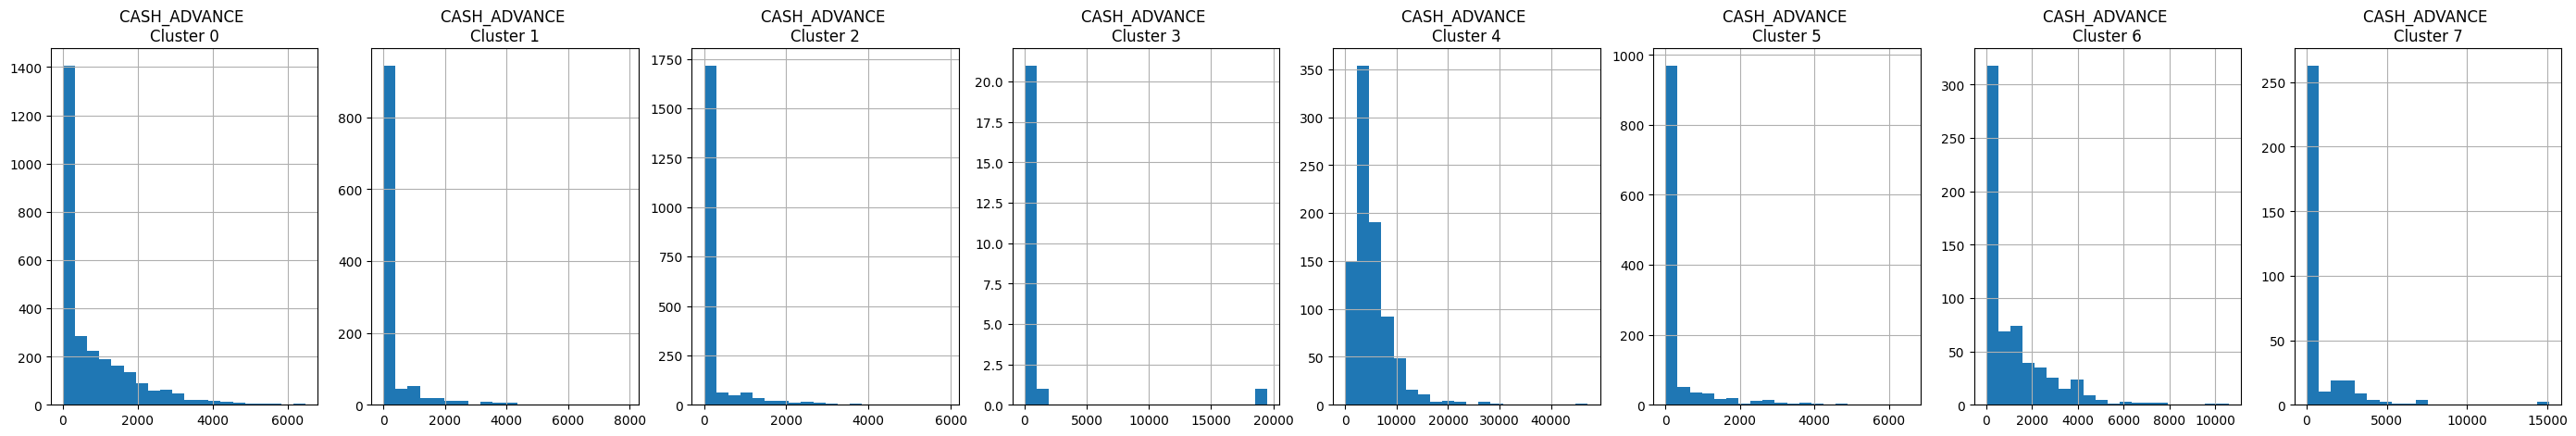

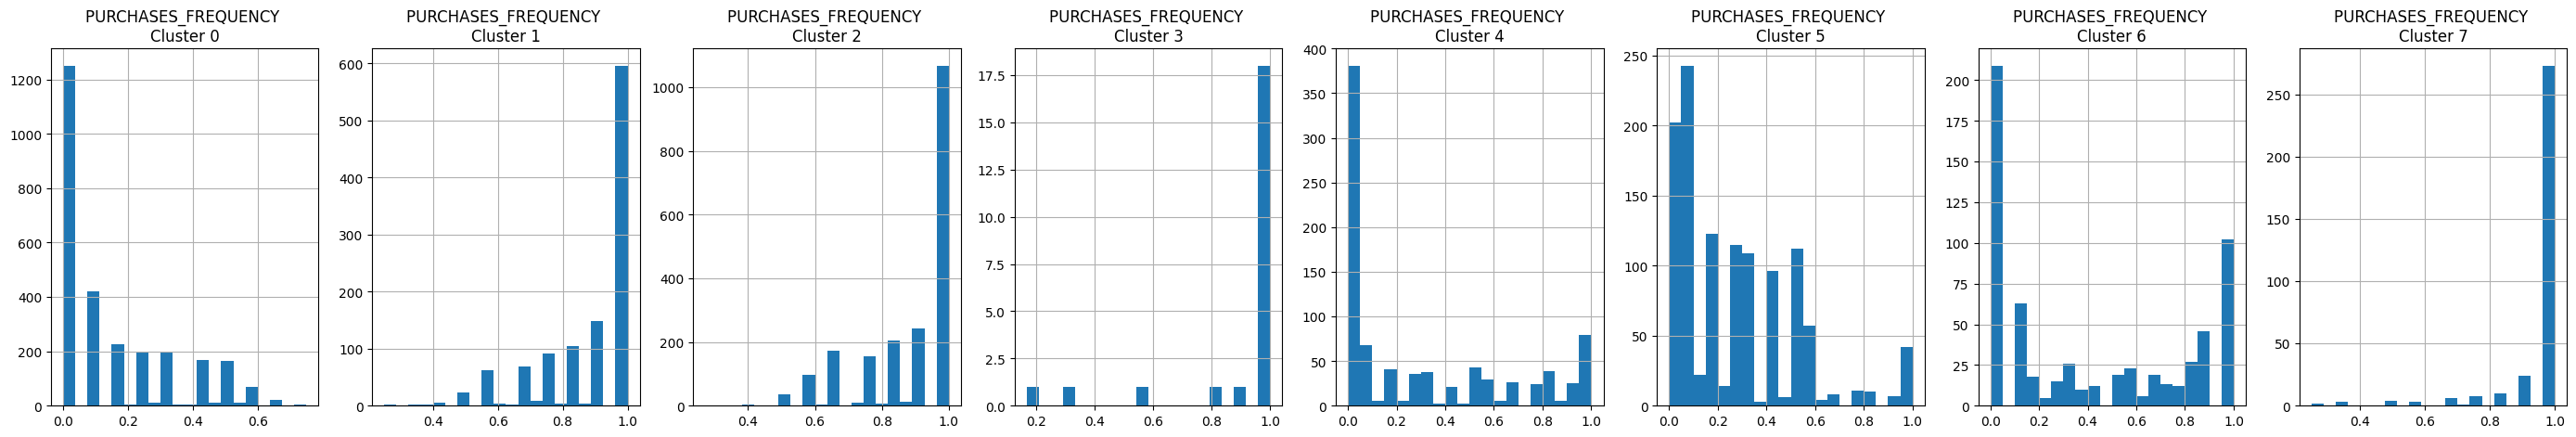

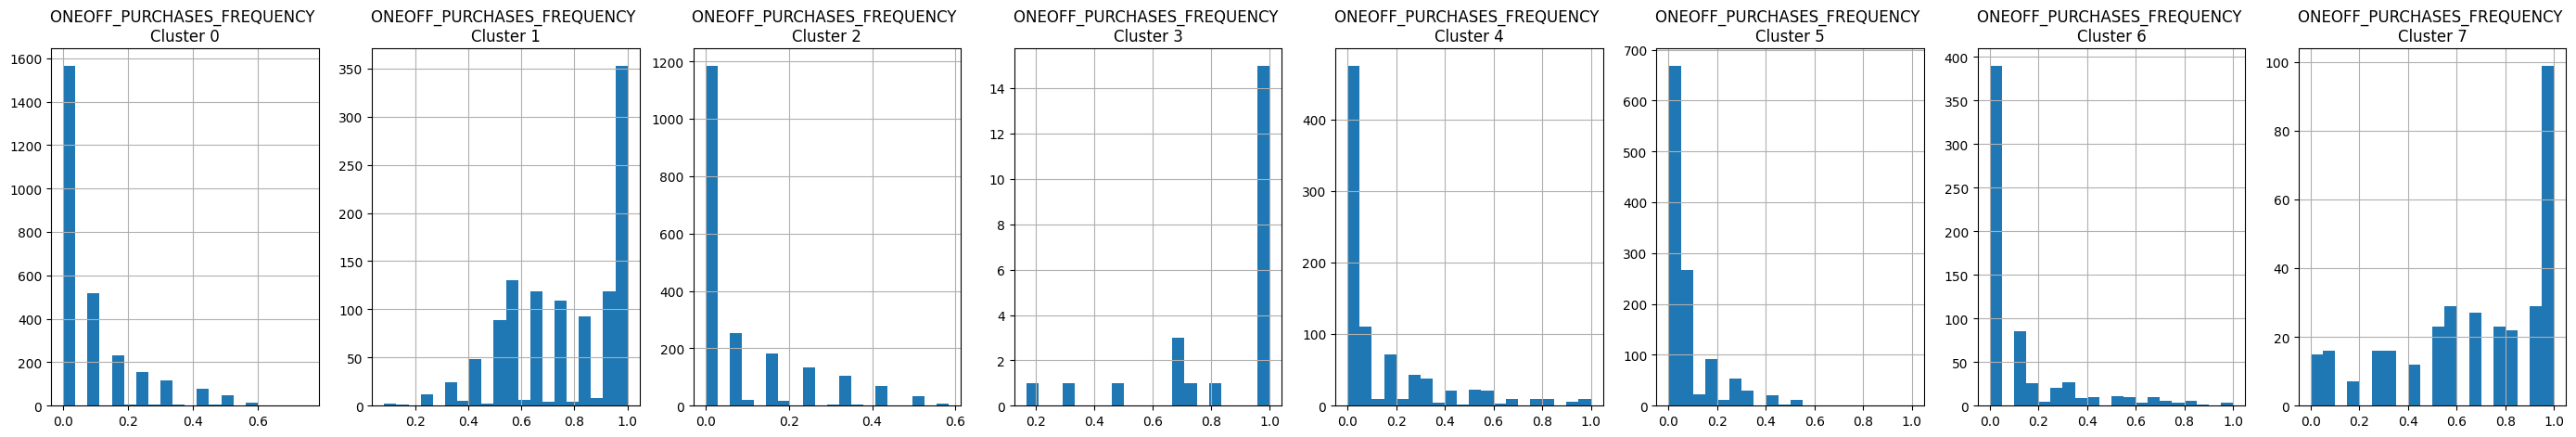

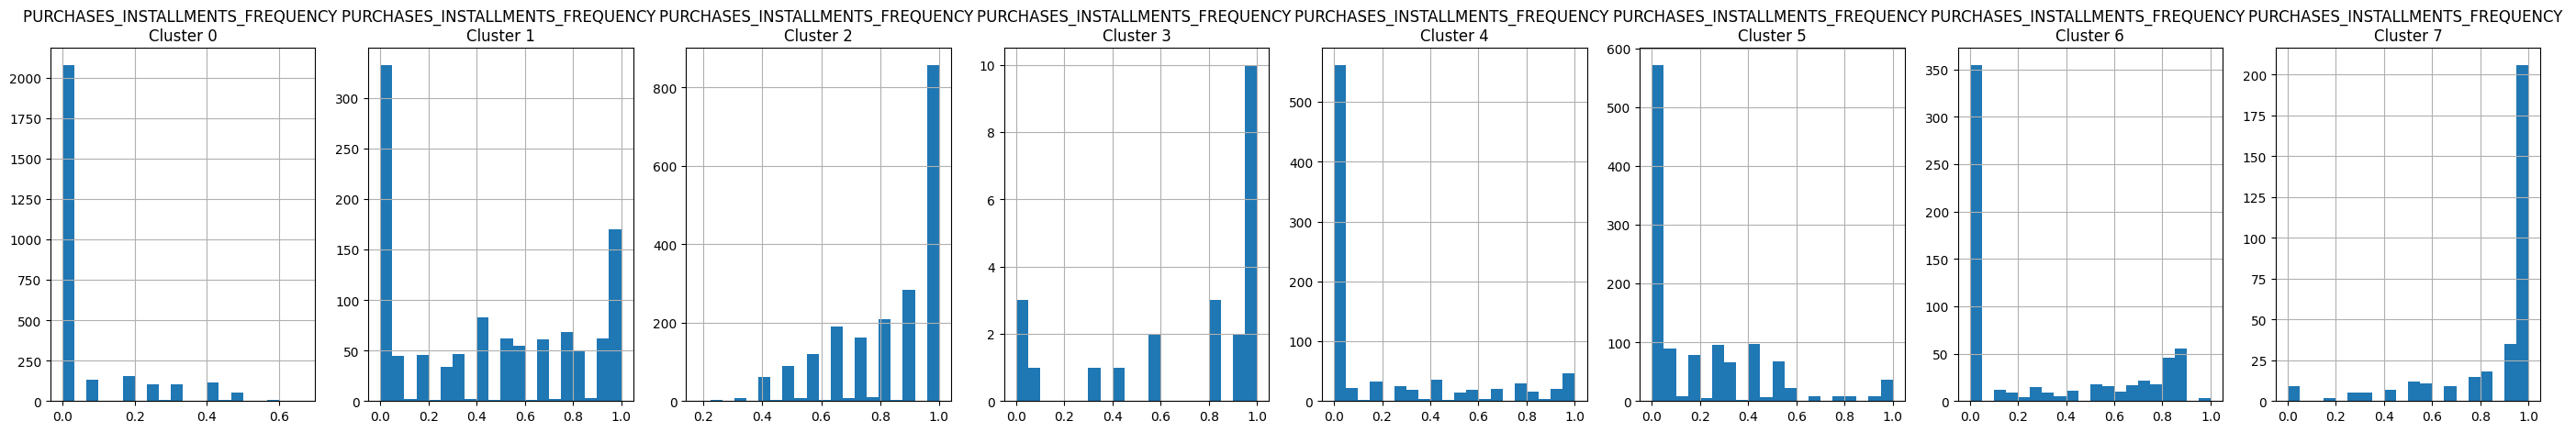

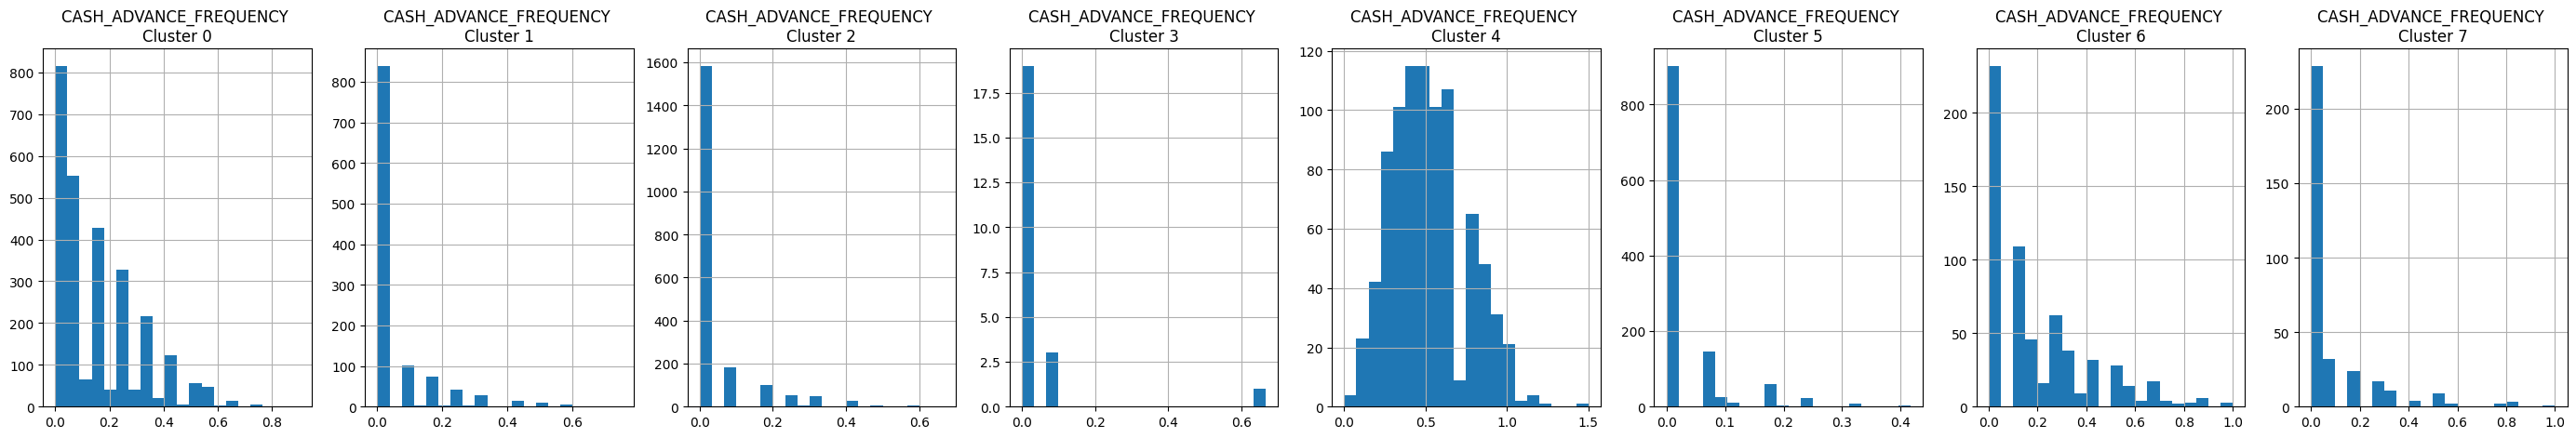

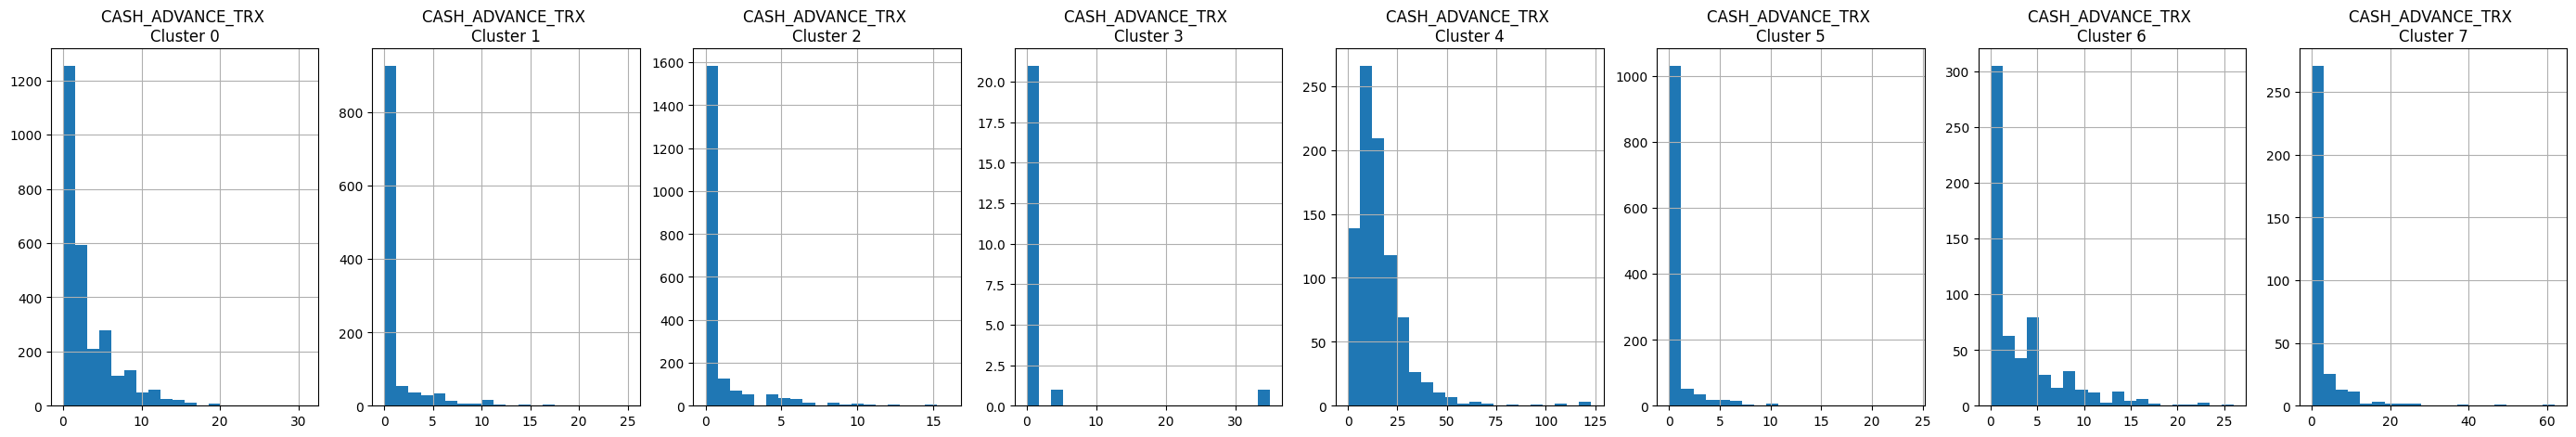

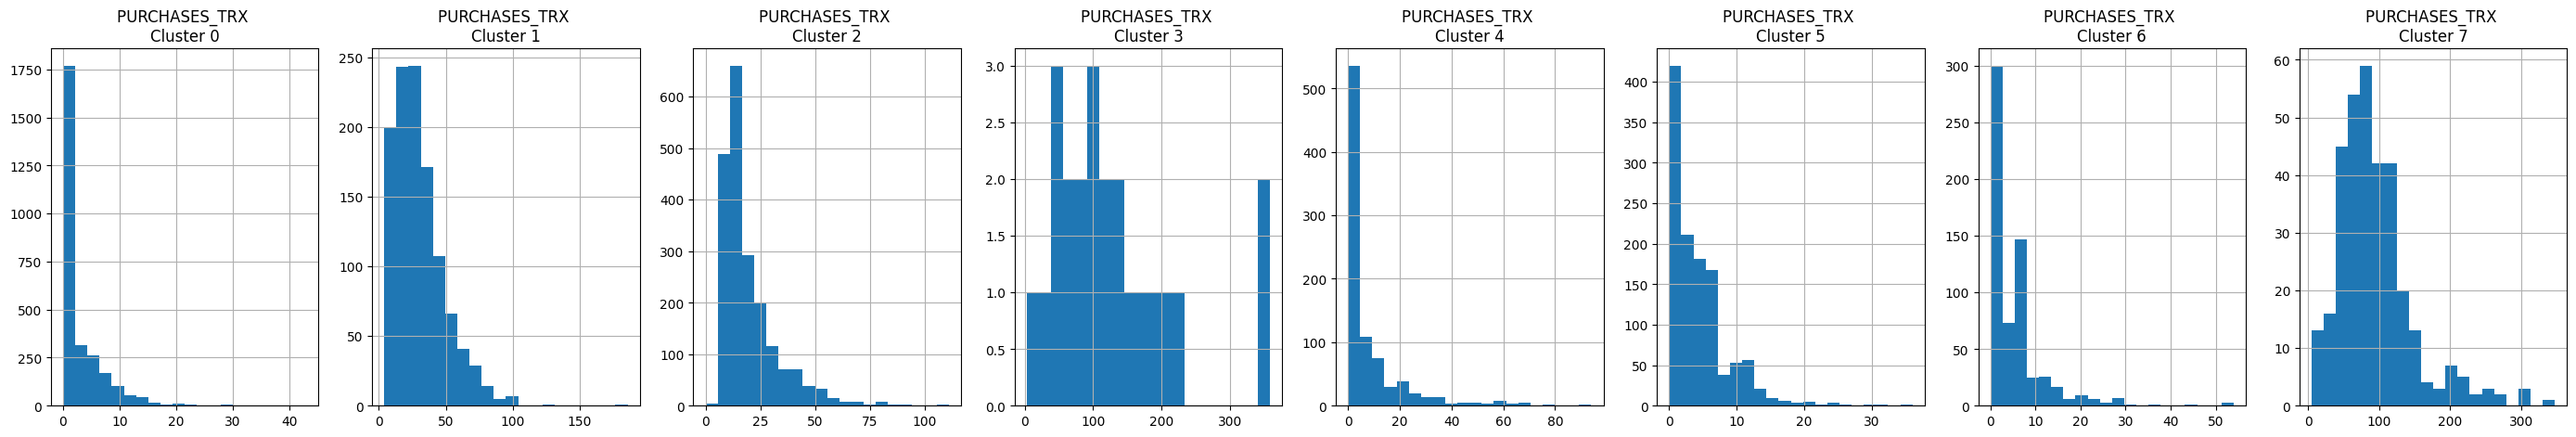

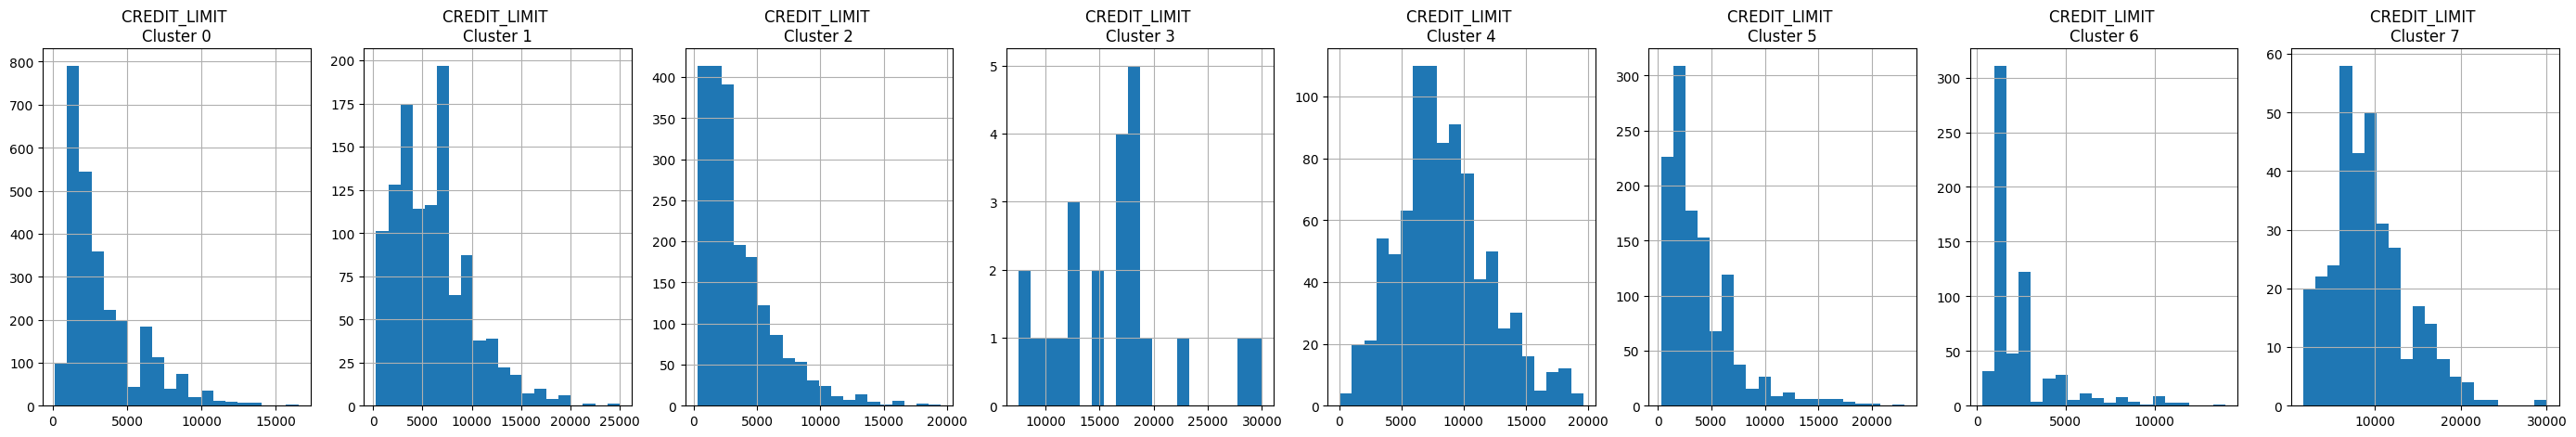

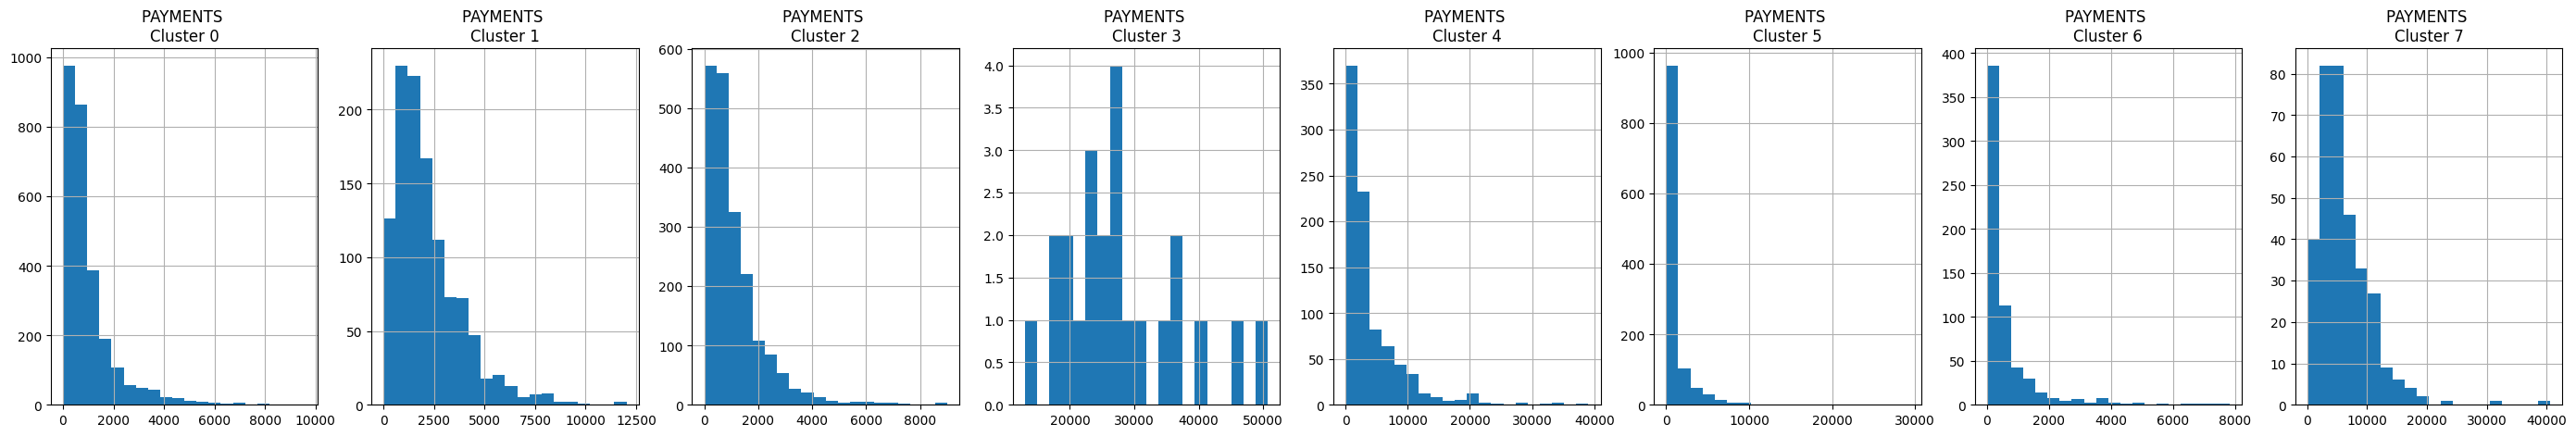

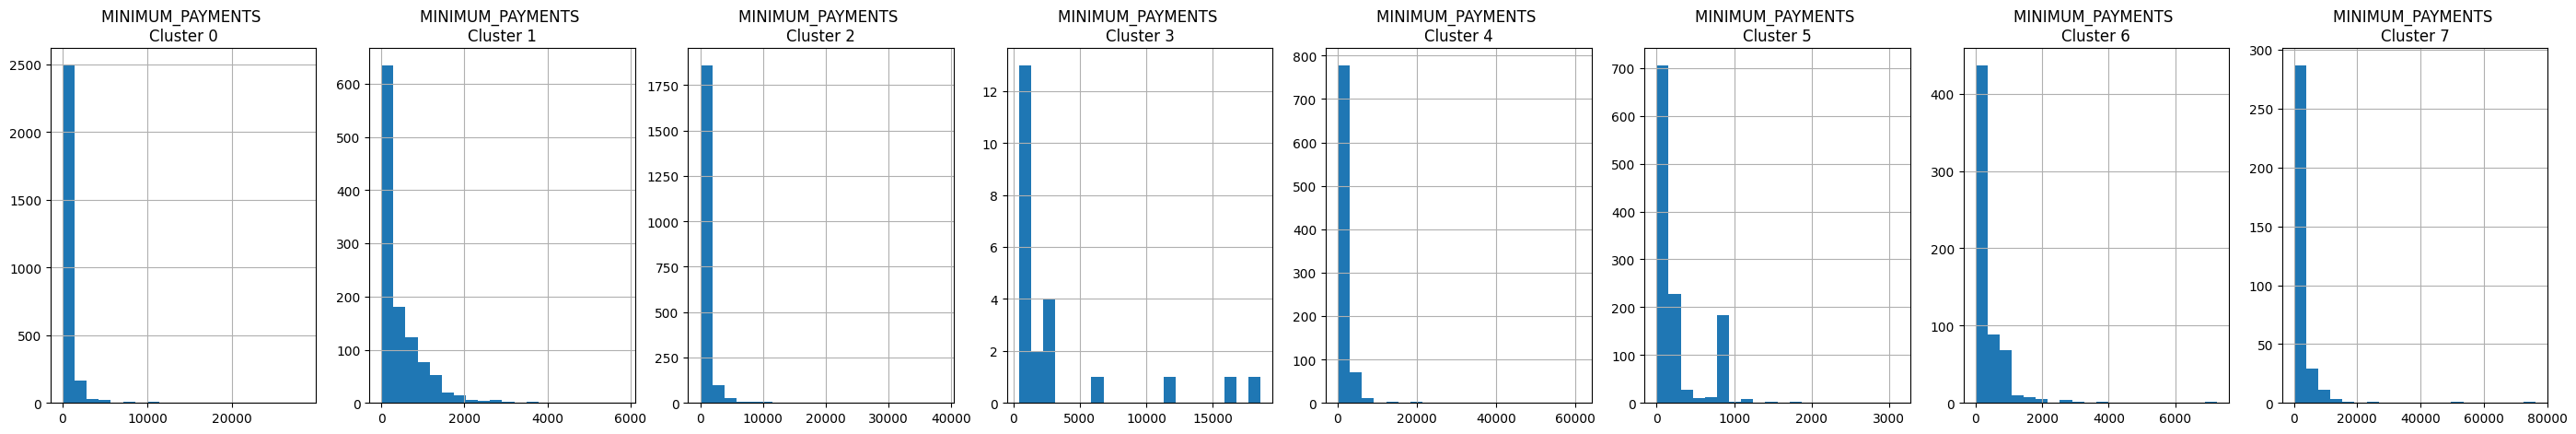

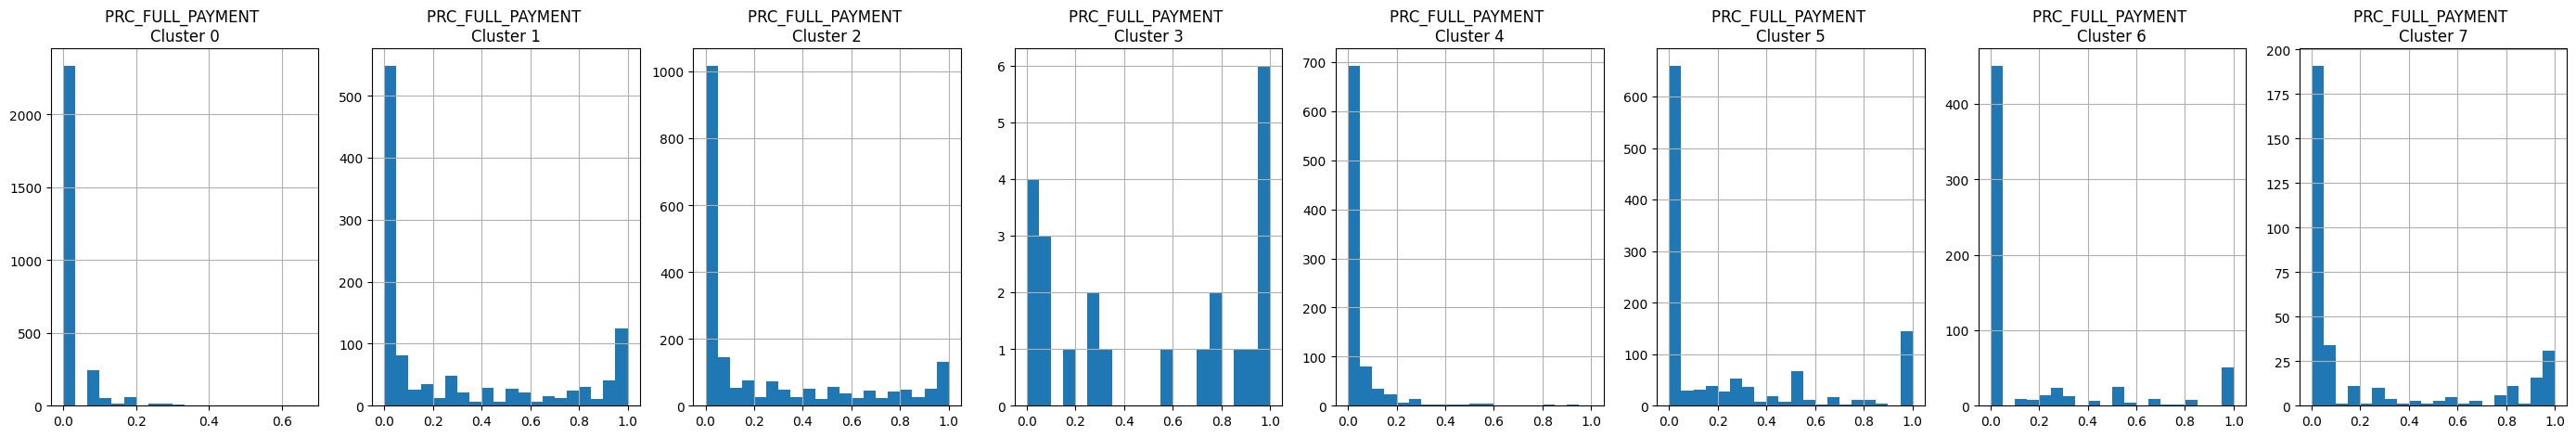

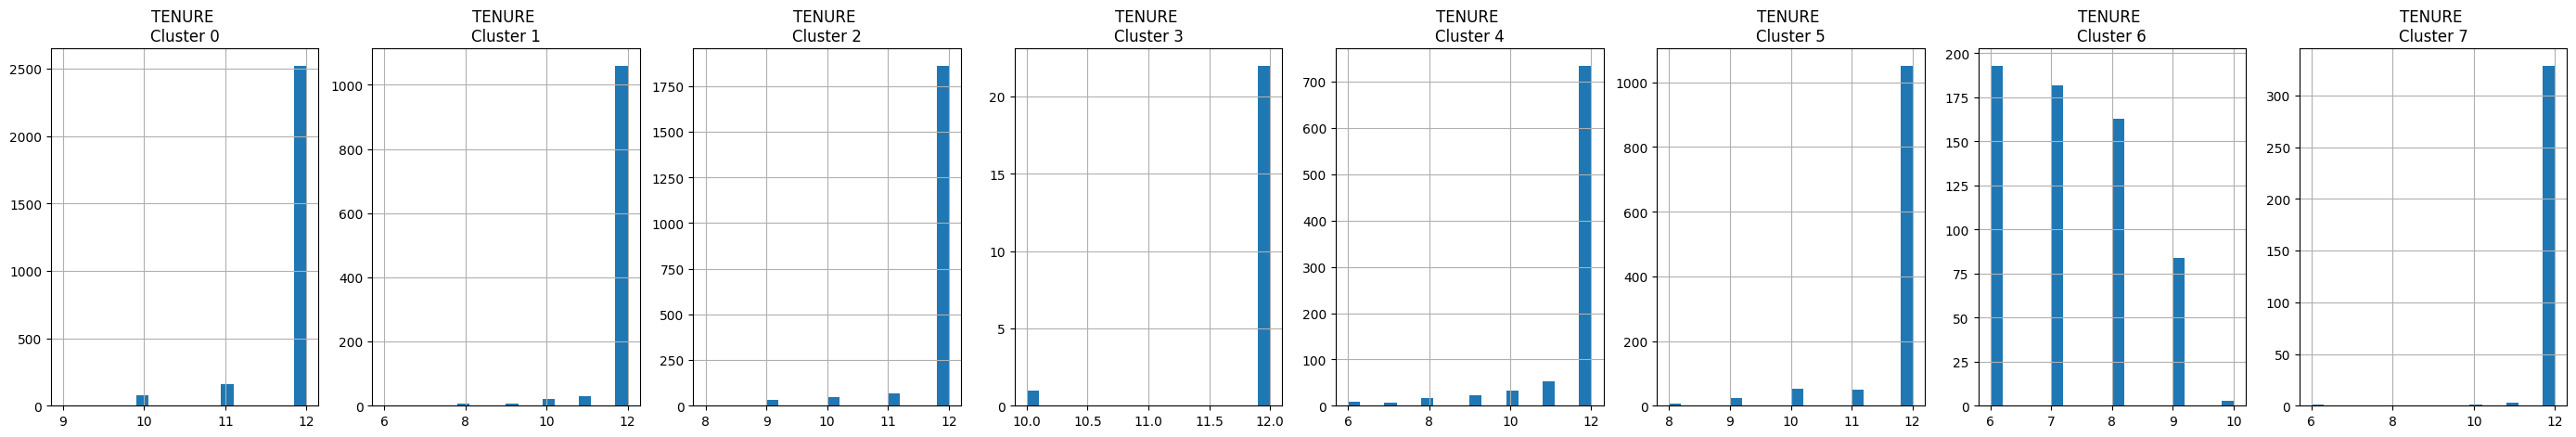

In [37]:
for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1, 8, j + 1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {}'.format(i, j))
  plt.show()

In [38]:
credit_ordered = creditcard_df_cluster.sort_values(by = 'cluster')
credit_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.0,12,0
4227,291.663664,1.000000,129.00,129.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,5500.0,284.596786,200.845446,0.0,12,0
4228,1437.977941,1.000000,229.94,229.94,0.0,901.185629,0.250000,0.250000,0.000000,0.583333,10,4,1800.0,783.528158,394.172631,0.0,12,0
4230,2063.855487,1.000000,220.40,220.40,0.0,2274.848149,0.083333,0.083333,0.000000,0.666667,11,1,2500.0,468.683047,441.951462,0.0,12,0
4233,1117.003540,1.000000,240.00,240.00,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,0,9,1200.0,366.532467,1020.099462,0.0,12,0


In [39]:
credit_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
5475,742.730997,1.0,6236.64,4613.70,1622.94,0.000000,1.0,1.000000,1.0,0.000000,0,49,3750.0,8529.330225,256.820140,0.833333,12,7
7336,3616.393429,1.0,2459.18,30.00,2429.18,0.000000,1.0,0.083333,1.0,0.000000,0,194,5500.0,2203.058360,922.316357,0.000000,12,7
5495,1127.643812,1.0,14454.98,10454.28,4000.70,0.000000,1.0,1.000000,1.0,0.000000,0,82,9000.0,12996.642710,289.757941,0.916667,12,7
2046,4784.708882,1.0,5848.99,2604.00,3244.99,3503.547107,1.0,0.583333,1.0,0.166667,6,119,5000.0,9006.196318,4513.488930,0.083333,12,7
2054,2928.480007,1.0,5747.76,4021.77,1725.99,0.000000,1.0,0.583333,1.0,0.000000,0,81,8000.0,4901.164291,788.689176,0.000000,12,7


In [ ]:
# credit_ordered.to_csv('cluster.csv')

## Aplicação de PCA (principal component analysis) e visualização dos resultados


O PCA é um método comum quando trabalhamos com agrupamentos. Ele reduz a dimensionalidade dos nossos dados de maneira que seja possível validar a criação dos clusters,isto é, validar a diferença nas variáveis medidas entre os clusters. As correlações (ou a falta delas) são convertidas em um gráfico 2D. Isso faz com que variáveis correlacionadas estejam agrupadas no gráfico.

In [40]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222216, -1.07645007],
       [-1.13829992,  2.5064708 ],
       [ 0.96968691, -0.38352463],
       ...,
       [-0.92620395, -1.81078228],
       [-2.33655195, -0.65795991],
       [-0.55641799, -0.40046714]])

### **Visualizando o gráfico PCA**

In [41]:
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682222,-1.076450
1,-1.138300,2.506471
2,0.969687,-0.383525
3,-0.873631,0.043164
4,-1.599435,-0.688579


In [42]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682222,-1.076450,0
1,-1.138300,2.506471,4
2,0.969687,-0.383525,1
3,-0.873631,0.043164,0
4,-1.599435,-0.688579,0


<Axes: xlabel='pca1', ylabel='pca2'>

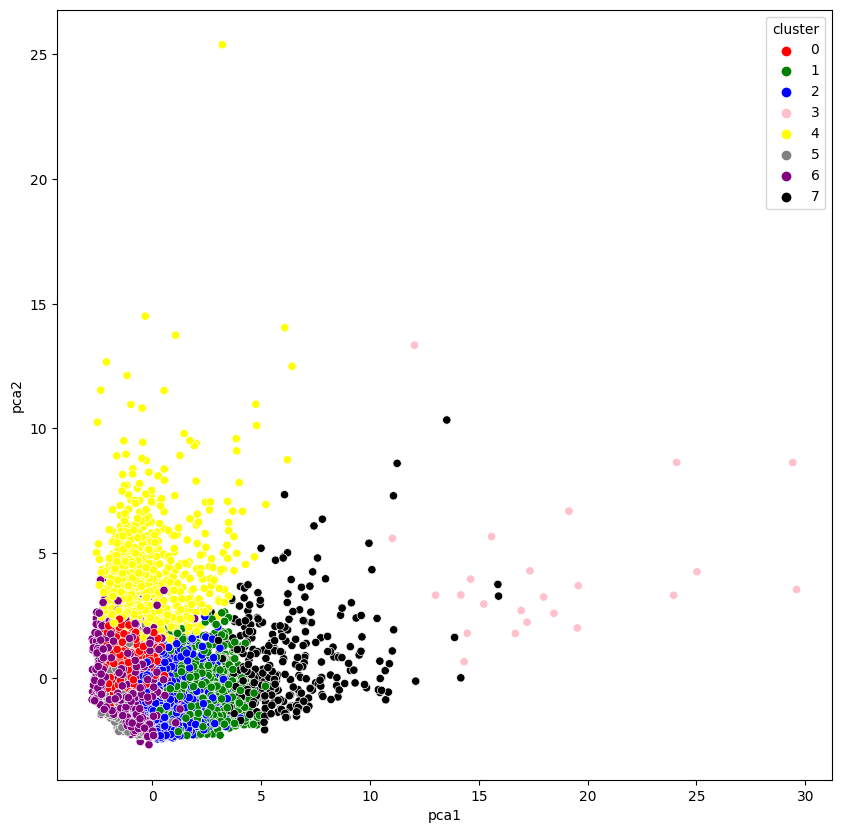

In [43]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black'])

Podemos ver que há separação entre os grupos, porém não é tão fácil de identificar, pois existem pontos sobrepostos e aglomerados. O único cluster notadamente distinto é cluster 4.

### Aplicação de autoencoders

Vamos aplicar outra redução de dimensionalidade, mas dessa vez com Autoencoders.

Autoencoders são redes neurais que visam copiar suas entradas para suas saídas. Eles trabalham compactando a entrada em uma representação de espaço latente e, em seguida, reconstruindo a saída dessa representação. (https://www.deeplearningbook.com.br/introducao-aos-autoencoders/#:~:text=Os%20Autoencoders%20s%C3%A3o%20uma%20t%C3%A9cnica,conhecimento%20compactada%20da%20entrada%20original.)

In [ ]:
# vamos reduzir as dimensões de 18 -> 10
# aplicar Elbow
# aplicar novamente o K-means
# visualizar com PCA

O autoencoder teŕa a seguinte estrutura:

n = neuronio

-> conectado

- 17n para camada de entrada -> 500n -> 2000n -> 10n (está será a camada do centro)

Então a dimensão foi de 17 para 10. Agora é preciso decodificar, então o restante da 
rede ficaria: se de 500 fomos para 2000, então iremos de 2000 para 500, e se fomos
de 17 para 500, então voltamos de 500 para 17.
- -> 2000n -> 500n -> 17n

Estrutura final:

17n -> 500n -> 2000n -> 10n -> 2000n -> 500n -> 17n

In [45]:
creditcard_df_scaled.shape

(8950, 17)

In [44]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [46]:
input_df = Input(shape=(17,)) # 17 ->
x = Dense(500, activation='relu')(input_df) # 500 ->
x = Dense(2000, activation='relu')(x) # 2000 -> 

encoded = Dense(10, activation='relu')(x) # 10 ->

x = Dense(2000, activation='relu')(encoded) # 2000 ->
x = Dense(500, activation='relu')(x) # 500 ->

decoded = Dense(17)(x) # 17

In [47]:
# autoencoder
autoencoder = Model(input_df, decoded)

In [48]:
# encoder
encoder = Model(input_df, encoded)

In [49]:
autoencoder.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [50]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, epochs = 50)

Epoch 1/50
280/280 [==============================] - 10s 30ms/step - loss: 0.1881
Epoch 2/50
280/280 [==============================] - 8s 30ms/step - loss: 0.0557
Epoch 3/50
280/280 [==============================] - 9s 31ms/step - loss: 0.0507
Epoch 4/50
280/280 [==============================] - 8s 29ms/step - loss: 0.0370
Epoch 5/50
280/280 [==============================] - 8s 30ms/step - loss: 0.0277
Epoch 6/50
280/280 [==============================] - 9s 32ms/step - loss: 0.0308
Epoch 7/50
280/280 [==============================] - 8s 29ms/step - loss: 0.0624
Epoch 8/50
280/280 [==============================] - 9s 31ms/step - loss: 0.0464
Epoch 9/50
280/280 [==============================] - 9s 32ms/step - loss: 0.0323
Epoch 10/50
280/280 [==============================] - 8s 29ms/step - loss: 0.0213
Epoch 11/50
280/280 [==============================] - 9s 30ms/step - loss: 0.0239
Epoch 12/50
280/280 [==============================] - 9s 32ms/step - loss: 0.0244
Epoch 13/50


In [51]:
creditcard_df_scaled.shape

(8950, 17)

In [52]:
compact = encoder.predict(creditcard_df_scaled)

280/280 [==============================] - 3s 9ms/step


In [53]:
compact.shape

(8950, 10)

In [54]:
creditcard_df_scaled[0]

array([-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882,
       -0.46678555, -0.80649035, -0.67866081, -0.70731317, -0.67534886,
       -0.47606982, -0.51133325, -0.96043334, -0.52897879, -0.31096755,
       -0.52555097,  0.36067954])

In [55]:
compact[0]

array([0.45221603, 0.38566628, 0.        , 0.14581491, 0.5967944 ,
       0.08121245, 0.7681063 , 0.05055787, 0.84216505, 0.        ],
      dtype=float32)

Aplicando Elbow

In [56]:
wcss_2 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(compact)
  wcss_2.append(kmeans.inertia_)

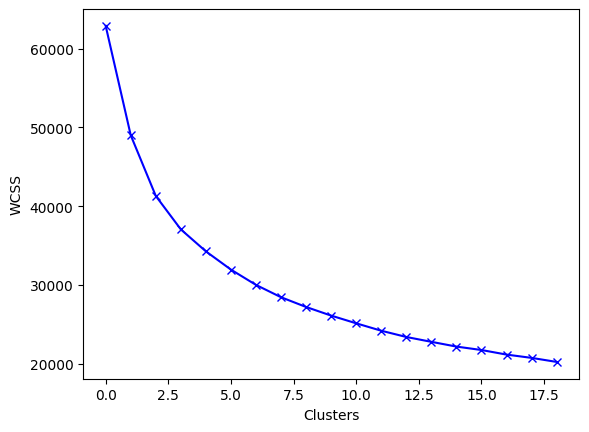

In [57]:
plt.plot(wcss_2, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

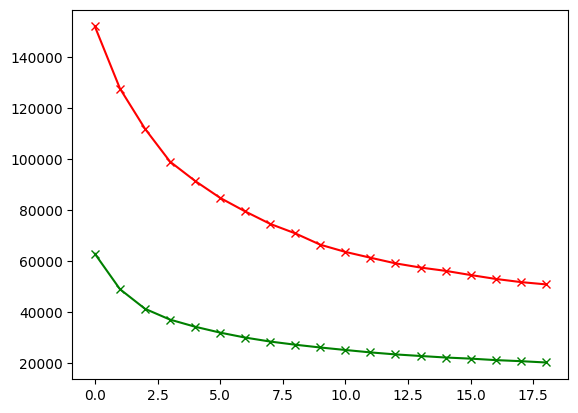

In [58]:
plt.plot(wcss_1, 'bx-', color = 'r')
plt.plot(wcss_2, 'bx-', color = 'g');

Vemos que entre o quarto e quinto cluster o wcss já não cai tanto, diferente de antes onde a partir de sétimo ou oitavo cluster é que isso acontecia. Vamos utilizar 4 clusters.

In [59]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(compact)

KMeans(n_clusters=4)

In [60]:
labels = kmeans.labels_
labels, labels.shape

(array([1, 0, 1, ..., 0, 0, 0], dtype=int32), (8950,))

Nossa base de dados tem somente 10 atributos e nós não podemos saber o que cada um desses atributos, mas o fato
é que nessa técnica que nós estamos desenvolvendo nós reduzimos a dimensionalidade dos dados para aplcar o K-Means com o objetivo de no final termos os valores/labels dos clusters para cada um dos 8950 clientes da base original.



In [61]:
df_cluster_at = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_at.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


Aplicando PCA

In [62]:
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(compact)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.217139,-0.157046
1,0.543535,0.886929
2,-0.902874,0.184539
3,-0.501241,0.213540
4,-1.418202,-0.039344


In [63]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.217139,-0.157046,1
1,0.543535,0.886929,0
2,-0.902874,0.184539,1
3,-0.501241,0.213540,1
4,-1.418202,-0.039344,1


<Axes: xlabel='pca1', ylabel='pca2'>

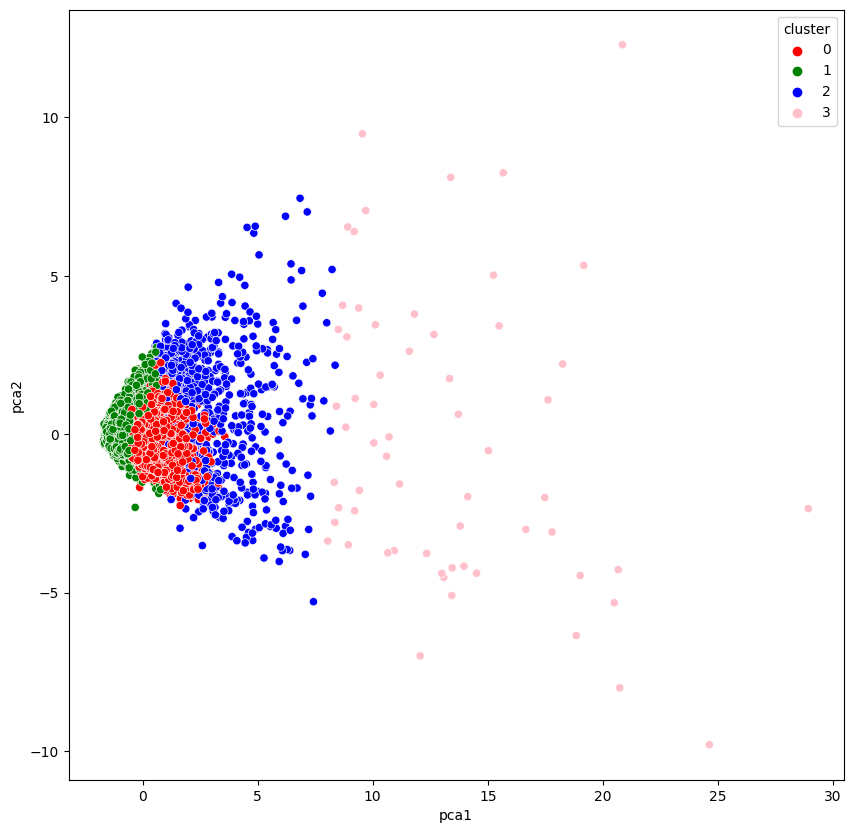

In [64]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink'])

Dessa vez os clusters estão mais bem definidos, antes havia mais pontos sobrepostos. Isso mostra como a utilização de autencoders para redução de dimensionalidade pode ajudar a obter resultados mais eficientes no agrupamento dos dados. Dessa vez, trabalhando com 4 clusters foi possível visualizar grupos mais definidos e separados no gŕafico PCA e isto indica que os dados validam esses grupos.

In [65]:
df_cluster_ordered = df_cluster_at.sort_values(by = 'cluster')
df_cluster_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
8949,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.000000,6,0
6846,162.046468,1.000000,1768.05,0.00,1768.05,0.000000,1.000000,0.000000,1.000000,0.000000,0,18,5000.0,1668.054457,172.804335,0.916667,12,0
2738,45.625764,0.545455,0.00,0.00,0.00,385.950518,0.000000,0.000000,0.000000,0.250000,3,0,10000.0,256.794478,116.200667,0.100000,12,0
2739,358.011796,0.545455,0.00,0.00,0.00,1795.200197,0.000000,0.000000,0.000000,0.083333,1,0,1950.0,4702.661168,501.485565,0.250000,12,0
2740,810.523480,0.727273,985.33,856.09,129.24,0.000000,0.416667,0.166667,0.166667,0.000000,0,10,5500.0,5964.049531,502.623056,0.090909,12,0


In [66]:
df_cluster_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
71,2990.422186,0.909091,4523.27,1664.09,2859.18,27296.485760,0.666667,0.500000,0.583333,0.833333,27,33,7000.0,28232.69446,1107.030803,0.454545,12,3
645,1482.235539,1.000000,14604.87,2475.93,12128.94,0.000000,1.000000,0.583333,1.000000,0.000000,0,219,15500.0,14462.63056,340.717801,1.000000,12,3
7254,4530.205197,1.000000,1750.66,643.18,1107.48,26268.699890,1.000000,0.333333,1.000000,0.583333,10,36,8500.0,25203.91336,1366.869273,0.250000,12,3
153,13673.079610,1.000000,9792.23,3959.81,5832.42,2444.445738,1.000000,0.750000,1.000000,0.750000,26,216,20000.0,11717.30794,6042.391629,0.000000,12,3
2159,10905.053810,1.000000,431.93,133.50,298.43,47137.211760,0.583333,0.250000,0.500000,1.000000,123,21,19600.0,39048.59762,5394.173671,0.000000,12,3


In [ ]:
# df_cluster_ordered.to_excel('cluster_ordereded.xls')

In [67]:
cluster0 = df_cluster_ordered[df_cluster_ordered['cluster']==0]
cluster0.head()
cluster0.describe()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
count,2630.000000,2630.000000,2630.000000,2630.000000,2630.000000,2630.000000,2630.000000,2630.000000,2630.000000,2630.000000,2630.000000,2630.000000,2630.000000,2630.000000,2630.000000,2630.000000,2630.000000,2630.0
mean,478.255001,0.671716,1097.496266,585.100106,512.665171,557.334796,0.573223,0.233075,0.439766,0.073028,1.527376,15.060837,4324.179573,1546.802455,414.277165,0.359108,11.022814,0.0
std,847.343289,0.324279,1277.439762,1028.306848,681.088529,1290.151051,0.392887,0.331209,0.400270,0.152793,3.827367,18.263011,3560.262596,1650.297330,1039.689669,0.398353,1.884314,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.0
25%,25.195189,0.363636,122.710000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,2.000000,1500.000000,325.696149,116.059259,0.000000,11.000000,0.0
50%,126.909076,0.750000,582.770000,53.000000,228.160000,0.000000,0.666667,0.083333,0.416667,0.000000,0.000000,9.000000,3000.000000,988.830606,173.088872,0.166667,12.000000,0.0
75%,480.985496,1.000000,1691.802500,794.607500,786.887500,264.537736,1.000000,0.333333,0.833333,0.083333,1.000000,21.000000,6000.000000,2253.686682,360.066554,0.750000,12.000000,0.0
max,7215.195760,1.000000,7654.810000,7311.990000,3927.120000,9139.119365,1.000000,1.000000,1.000000,1.166667,48.000000,130.000000,25000.000000,11267.694780,19443.453520,1.000000,12.000000,0.0


- **grupo 0**
  - tem pouco saldo na conta

  - sacam pouco dinheiro adiantado, então são clientes que pagam poucos  juros para o banco e são mais cuidadosos com seu dinheiro
  
  - em média, 35% dos clientes desse grupo pagam a fatura completa do cartão

  - possuem uma frequência média de compra de 57% e realizam compras mais parceladas do que à vista

In [68]:
cluster1 = df_cluster_ordered[df_cluster_ordered['cluster']==1]
cluster1.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
count,5428.000000,5428.000000,5428.000000,5428.000000,5428.000000,5428.000000,5428.000000,5428.000000,5428.000000,5428.000000,5428.000000,5428.000000,5428.000000,5428.000000,5428.000000,5428.000000,5428.000000,5428.0
mean,1576.619427,0.964202,487.107150,295.320871,192.023968,698.684301,0.419646,0.153480,0.295471,0.134873,2.831245,9.358143,3777.915578,1005.238904,740.373974,0.055341,11.730472,1.0
std,1663.926348,0.096863,658.064207,555.526986,310.655025,1131.232711,0.388021,0.245179,0.373621,0.177915,4.514527,13.086872,2849.006379,1012.164889,1173.530415,0.142368,0.928500,0.0
min,0.004816,0.363636,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.037744,0.000000,6.000000,1.0
25%,346.158989,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1500.000000,355.507902,194.001425,0.000000,12.000000,1.0
50%,1116.973778,1.000000,247.475000,0.000000,0.000000,78.134518,0.333333,0.000000,0.000000,0.083333,1.000000,5.000000,3000.000000,678.699922,409.010581,0.000000,12.000000,1.0
75%,2122.255221,1.000000,676.652500,355.227500,287.557500,1003.822555,0.833333,0.181818,0.583333,0.250000,4.000000,12.000000,5500.000000,1328.433849,864.206542,0.000000,12.000000,1.0
max,12596.421940,1.000000,4900.000000,4900.000000,2714.090000,7635.621091,1.000000,1.000000,1.000000,1.142857,44.000000,186.000000,18000.000000,9226.751112,17693.078470,1.000000,12.000000,1.0


- **grupo 1**
  - possuem mais saldo na conta do que o grupo 0, mas também não sacam muito dinheiro do limite do cartão
  - possuem uma frequência de compra média de 41%
  - são maus pagadores da fatura completa, apenas 5%
  -  pelo baixo percentual de pagamento de fatura apresentam uma propensão maior para endividamento

In [69]:
cluster2 = df_cluster_ordered[df_cluster_ordered['cluster']==2]
cluster2.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
count,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.0
mean,4603.046875,0.956249,3032.766101,1860.073165,1173.521998,3766.425708,0.666262,0.398152,0.551755,0.327250,10.891697,42.441637,9021.064435,5613.469991,2604.106691,0.130850,11.665463,2.0
std,3256.828936,0.134970,3155.015410,2525.570907,1500.643324,3913.959854,0.403144,0.375409,0.423743,0.304843,14.734447,48.726071,4108.059349,4292.166938,4671.207394,0.274487,1.135940,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000,13.545097,0.000000,6.000000,2.0
25%,2016.681801,1.000000,320.040000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,4.000000,6000.000000,2369.747795,656.348440,0.000000,12.000000,2.0
50%,4114.723127,1.000000,1975.720000,740.000000,585.900000,2817.033970,0.916667,0.272727,0.666667,0.250000,6.000000,25.000000,8500.000000,4627.972313,1401.967646,0.000000,12.000000,2.0
75%,6726.324806,1.000000,5047.020000,2861.345000,1784.150000,6135.212672,1.000000,0.750000,1.000000,0.571429,16.000000,66.500000,11500.000000,7861.685721,2578.554528,0.083333,12.000000,2.0
max,18495.558550,1.000000,14332.920000,14215.000000,8391.550000,23130.821060,1.000000,1.000000,1.000000,1.500000,123.000000,309.000000,30000.000000,28988.973880,43132.728230,1.000000,12.000000,2.0


**grupo 2**:

 - possuem muito dinheiro na conta
 - sacam muito dinheiro do limite do cartão
 - possuem limite de crédito alto
 - possuem um frequência média de 13% para o pagamento da fatura completa
 - então apesar de ser um grupo com potencial para o banco, há de se considerar o risco de endividamento desses clientes dado o baixo percentual de pagamento da fatura completa
 - compram com frequência maior que os grupos 0 e 1
 - a frequência de compras parceladas é maior que as compras à vista

In [72]:
cluster3 = df_cluster_ordered[df_cluster_ordered['cluster']==3]
cluster3.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.0
mean,5921.587718,0.928316,15213.472787,10078.339344,5135.133443,6110.619541,0.812444,0.574643,0.701781,0.220318,10.508197,98.000000,13929.508197,21677.322672,7579.295337,0.363385,11.852459,3.0
std,4325.711190,0.194371,12070.516653,11257.610926,5122.419910,10300.311710,0.332400,0.390176,0.386739,0.337761,21.211336,94.395268,5444.365413,10993.001474,15437.683356,0.394291,0.703232,0.0
min,34.207779,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3000.000000,92.865469,289.757941,0.000000,7.000000,3.0
25%,2643.343414,1.000000,4523.270000,643.180000,900.870000,0.000000,0.750000,0.181818,0.416667,0.000000,0.000000,21.000000,9000.000000,13733.557830,586.029097,0.000000,12.000000,3.0
50%,4628.109931,1.000000,13771.630000,4001.410000,3887.000000,0.000000,1.000000,0.666667,0.916667,0.000000,0.000000,72.000000,14500.000000,20418.332380,1797.797941,0.200000,12.000000,3.0
75%,8700.079439,1.000000,22500.000000,17945.000000,8278.320000,10616.270140,1.000000,1.000000,1.000000,0.363636,12.000000,136.000000,18000.000000,28232.694460,5433.759888,0.750000,12.000000,3.0
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.000000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,3.0


**grupo 3**:

 - grupo com mais dinheiro na conta
 - sacam muito mais dinheiro do limite do cartão do que todos os outros
 - possuem limite de crédito mais alto
 - possuem um frequência média de 36% para o pagamento da fatura completa, sendo esta a maior dentre os grupos
 - (uma estratégia para o banco seria incentivar o hábito de compras nesse grupo)
 - é o grupo que compra com mais frequência
 - a frequência de compras à vista é a maior que tem

Sendo assim, este é o grupo com maior potencial para o banco.

#### **Insights gerais para todos os clientes**
 - Em média, as pessoas sacam mais dinheiro do limite do cartão de crédito do que o valor médio para compras parceladas e à vista

- Em média, somente 15% dos clientes pagam o valor completo da fatura

- A maioria dos clientes têm saldo entre 0 e 5000

- Os clientes atualizam com frequência o saldo das contas

- A maioria das transações estão abaixo de 10.000

- O valor das compras à vista são maiores que das compras parceladas. Isso indica que a maior parte dos valores das compras vem de compras à vista e não parceladas.

- Existem dois grupos aparen:tes, um grupo de clientes que compram com baixa frequência e um grupo que compra com bastante frequência

- As compras à vista e à prazo ocorrem com frequências similares

- A maioria dos clientes do banco são clientes há pelo menos 12 anos

Além disso, foi possível definir alguns grupos de clientes, alguns com um maior potencial para o banco (grupo 2 e 3), outros nem tanto (grupo 0 e 1). 

##### **Em posse disso, o banco poderia elaborar estratégias de marketing para lidar com cada grupo e impulsionar os ganhos.**

